# YouTube Simulation (in notebook form)

### Initializing environment packages and variables 📚

In [1]:
# Importing libraries/packages
import random
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import logging
from tqdm.notebook import tqdm

# Importing class files
from agent import Agent
from video import Video
from activity import Activity
from behavior_reference import BEHAVIOR_ARCHETYPE_PARAMETERS
from behavior_reference import AGENT_ARCHETYPE_DISTRIBUTION

In [2]:
# Defining our macro values to be referenced later on
NUM_VIDEOS = 10000;
NUM_AGENTS = 100;
RAND_SYSTEM_TOGGLE = True
REC_SYSTEM_TOGGLE = True
SCORE_SYSTEM_TOGGLE = True

### Creation of Video Objects 🎥

In [3]:

# Generate random view count (views range from 1 to 1 million)
random_view_counts = []
for i in range(NUM_VIDEOS):
    r = random.randint(1, 1000000)
    random_view_counts.append(r)


# Generate random (unique) video ids
# resultant random numbers list
random_video_ids = []
extremeness_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# traversing the loop 1000 times
for i in range(NUM_VIDEOS):

    # r=random.randint(1,100000)
    # # checking whether the generated random number is not in the
    # # randomList
    # if r not in random_video_ids:
    #     # appending the random number to the resultant list, if the condition is true
        random_video_ids.append(i)


# Generate random video length
random_vid_lengths = []
for i in range(NUM_VIDEOS):
    r = random.randint(1, 80)
    random_vid_lengths.append(r)

# Generate random video extremeness
random_extremeness = []
for i in range(NUM_VIDEOS):
    r = random.choice(extremeness_values)
    random_extremeness.append(r)


# Generate random number of thumbs up
random_thumbs_up = []
for i in range(NUM_VIDEOS):
    r = random.randint(0, 50000)
    random_thumbs_up.append(r)


# Use the above arrays to create video objects
all_videos = []
for i in range(NUM_VIDEOS):   # create videos


    # Grab the data points for the video
    views = random_view_counts[i];
    vid_id = random_video_ids[i];
    length = random_vid_lengths[i];
    extremeness = random_extremeness[i];
    thumbs_up = random_thumbs_up[i];

    # Create the video object
    random_vid = Video(views, vid_id, length, extremeness, thumbs_up);

    # Add the video object to our array of videos
    all_videos.append(random_vid);

In the cell below, we can test that the video objects are created properly.

In [4]:
# Let's make sure this worked.

print("Information for the first three videos:");
for i in range(3):
    print("Views: " + str(all_videos[i].views));
    print("Video ID: " + str(all_videos[i].vid_id));
    # print("Length: " + str(all_videos[i].length) +  " minutes");
    print("Extremeness: " + str(all_videos[i].extremeness));
    # print("Thumbs up count: " + str(all_videos[i].thumbs_up));
    print("");

# # Let's test the watch function
for i in range(10):
    Activity.watch(all_videos[i])

Information for the first three videos:
Views: 881334
Video ID: 0
Extremeness: 0.5

Views: 248710
Video ID: 1
Extremeness: 1

Views: 614305
Video ID: 2
Extremeness: 1



### Creating our Agents 👩‍🔬

In [5]:
# Now that we've generated the videos, we can generate our agents.
# Let's start with 100 agents.

# This means we will have the following archetype counts:
"""
AGENT_ARCHETYPE_DISTRIBUTION = {
    "progressive_activist": .08,
    "traditional_liberal": .11,
    "passive_liberal": .15,
    "politically_disengaged": .26,
    "moderate": .15,
    "traditional_conservative": .19,
    "devoted_conservative": .06
}    

"""

# The distribution for our agent archetypes
AGENT_ARCHETYPE_DISTRIBUTION = {
    "progressive_activist": 0.08,
    "traditional_liberal": 0.11,
    "passive_liberal": 0.15,
    "politically_disengaged": 0.26,
    "moderate": 0.15,
    "traditional_conservative": .19,
    "devoted_conservative": 0.06
}

# Creating an array to hold our agents
our_agents = [];

id_counter = 0;
# Generate the progressive activists (8)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["progressive_activist"] * NUM_AGENTS)):    
    our_agent = Agent(False, "progressive_activist", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the traditional liberals (11)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["traditional_liberal"] * NUM_AGENTS)):
    our_agent = Agent(False, "traditional_liberal", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the passive liberals (15)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["passive_liberal"] * NUM_AGENTS)):
    our_agent = Agent(False, "passive_liberal", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the politically disengaged (26)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["politically_disengaged"] * NUM_AGENTS)):
    our_agent = Agent(False, "politically_disengaged", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the moderates (15)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["moderate"] * NUM_AGENTS)):
    our_agent = Agent(False, "moderate", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the traditional conservatives (19)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["traditional_conservative"] * NUM_AGENTS)):
    our_agent = Agent(False, "traditional_conservative", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

# Generate the devoted conservatives (6)
for i in range(int(AGENT_ARCHETYPE_DISTRIBUTION["devoted_conservative"] * NUM_AGENTS)):
    our_agent = Agent(False, "devoted_conservative", id_counter, "");
    our_agents.append(our_agent);
    id_counter += 1;

Once again, we can grab some data to test that these agents were created successfully.

In [6]:
for i in range(6,10):   # just a frew random agents versus showing the whole list
    print("Agent ID: " + str(our_agents[i].agent_id) + "\tArchetype: " + our_agents[i].archetype);

Agent ID: 6	Archetype: progressive_activist
Agent ID: 7	Archetype: progressive_activist
Agent ID: 8	Archetype: traditional_liberal
Agent ID: 9	Archetype: traditional_liberal


### Simulating a Day 📅

So, what does an agent do in a given day?

* Click on a video (they will be provided with a random video at start of day)
    * Decide to watch the video if it aligns with their archetype parameters
    * Actually watch the video
    * Increment the video views
    * Add the video length to their total time spent watching for today
    * Flip a coin to determine if a thumbs up is left
    * If total time spent watching for today is under their archetype's daily limit, find a new video.
        * If over time, stop watching and end the day.


#### Defining Functions

In [7]:
# Function to click on a video (agent will be provided with a random video at start of day)
def suggest_video(video_list, NUM_VIDEOS):
    # With the recommendation algorithm, this will probably become obsolete.
    random_video_id = random.randrange(NUM_VIDEOS);
    return video_list[random_video_id];
    

# Function to print the attributes of a video object
def display_vid_attrs(our_video):
    rand_vid_views = our_video.views
    rand_vid_id = our_video.vid_id
    rand_vid_length = our_video.length
    rand_vid_extremeness = our_video.extremeness
    rand_vid_thumbsup = our_video.thumbs_up

    print("Video ID: " + str(rand_vid_id))
    print("View Count: " + str(rand_vid_views))
    print("Length: " + str(rand_vid_length) + " minutes")
    print("Extremeness: " + str(rand_vid_extremeness))
    print("Thumbs Up Count: " + str(rand_vid_thumbsup))


# Function to display an agent's ID and archetype
def display_agent(our_agent):
    print("Agent ID: " + str(our_agent.agent_id));
    print("Archetype: " + our_agent.archetype)


# I copied this from https://www.geeksforgeeks.org/python-reversing-list/#
def Reverse(lst):
   new_lst = lst[::-1]
   return new_lst

def Average(list):
    avg = sum(list) / len(list)
    return avg


# Returns a list of videos filtered based on agent archetypes.
# Note from 10/23/23: this seems to be, for now, the "recommendation" part. This should be toggleable, and have the ability
# to view the differences in graphs side-by-side like with the random video system.

def filter_vids(video_list, our_agent):
    filter_archetype = our_agent.archetype     # gets the archetype of the provided agent. 
    filtered_vids = [];    # array to be returned; holds list of videos that pass checks


    daily_agent_longest_vid = BEHAVIOR_ARCHETYPE_PARAMETERS[filter_archetype]["longest_vid_threshold"]
    daily_agent_yt_threshold = BEHAVIOR_ARCHETYPE_PARAMETERS[filter_archetype]["yt_time_threshold"]
    daily_agent_pol_aff = BEHAVIOR_ARCHETYPE_PARAMETERS[filter_archetype]["political_affiliation"]
    daily_agent_vid_extr = BEHAVIOR_ARCHETYPE_PARAMETERS[filter_archetype]["video_extremity"]
    daily_agent_pop_thresh = BEHAVIOR_ARCHETYPE_PARAMETERS[filter_archetype]["popularity_threshold"]

    
    # Iterating through each video in our list of vidoes
    for i in range(NUM_VIDEOS):

        suggested_video = video_list[i] # gets the i-th video in the list of all videos


        # Compare our agent's thresholds to the attributes of the video

        # POPULARITY CHECK
        # Check minimum view threshold
        if(suggested_video.views >= daily_agent_pop_thresh):
            popularity_check = True
            logging.debug("Video is popular enough.")
        else:
            popularity_check = False
            logging.debug("Video is not popular enough.")


        # LENGTH CHECK
        # Check agent's max viewing length
        if(suggested_video.length < daily_agent_longest_vid):
            length_check = True
            logging.debug("Video is proper length.")
        else:
            length_check = False
            logging.debug("Video is too long.")


        # # TIME LEFT CHECK
        # # # Check if watching this video would exceed the agent's daily threshold
        # potential_mins_watched = agent_minutes_watched_today + suggested_video.length
        # if(potential_mins_watched < daily_agent_yt_threshold):
        #     time_left_check = True
        #     logging.debug("Still time to watch this video.")
        #     agent_minutes_watched_today = agent_minutes_watched_today + suggested_video.length
        #     agent_vids_watched_today = agent_vids_watched_today + 1
        # else:
        #     time_left_check = False
        #     logging.debug("Not enough time left to watch this video.")

        #Check if this video is too extreme for the agent.


        # EXTREME CHECK
        # Left-leaning archetypes will watch anything at 0.5 and above. Right-leaning will watch 0.5 and below.
        if(daily_agent_pol_aff == "left"):
            # Will not watch anything under 0.5 extremeness
            # If video extremeness is < 0.5 or higher than their extremeness value, do not watch.
            if((suggested_video.extremeness < 0.5) or (suggested_video.extremeness > daily_agent_vid_extr)):
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True
                logging.debug("Video is within extremeness bounds (between 0.5 and agent's archetype value).")
        elif(daily_agent_pol_aff == "right"):
            # Will not watch anything above 0.5 extremeness
            # If video extremeness is > 0.5 or lower than their extremeness value (0.0 is extreme here), do not watch.
            if((suggested_video.extremeness > 0.5) or (suggested_video.extremeness < daily_agent_vid_extr)):
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True
                logging.debug("Video is within extremeness bounds (between agent's archetype value and 0.5).")
        elif(daily_agent_pol_aff == "middle"):
            # print("Extremeness:" + str(suggested_video.extremeness))
            # figuring this archetype is like middle of the road, they'll watch between 0.4 and 0.6
            if((suggested_video.extremeness < 0.2) or (suggested_video.extremeness > 0.8)):
                
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True 


        # If all checks pass, the video will be added to the list of acceptable videos to watch.
        if(popularity_check and length_check and extreme_check):    # took out and time_left_check
            filtered_vids.append(suggested_video)   # adds the video to the list

    return filtered_vids



In [8]:
# Test the video clicking
print("Testing video clicking")
suggested_video = suggest_video(all_videos, NUM_VIDEOS)
display_vid_attrs(suggested_video)   

length_total_temp = 0
for i in range(NUM_VIDEOS):
    l = all_videos[i].length
    length_total_temp = length_total_temp + l

length_total_temp = length_total_temp / NUM_VIDEOS

print(length_total_temp)
print("\n\n")


# Test the video filtration function
list_of_filtered_videos = filter_vids(all_videos, our_agents[50])
print("Testing video filtration")
for i in range(2):
    display_vid_attrs(list_of_filtered_videos[i])
    print("")

Testing video clicking
Video ID: 5118
View Count: 319176
Length: 33 minutes
Extremeness: 0.5
Thumbs Up Count: 39137
40.5392



Testing video filtration
Video ID: 0
View Count: 881335
Length: 5 minutes
Extremeness: 0.5
Thumbs Up Count: 43653

Video ID: 9
View Count: 897680
Length: 2 minutes
Extremeness: 0.6
Thumbs Up Count: 40911



### ˚˖𓍢ִ໋🌷͙֒✧˚.🎀⋆ Work from 10/28/23

 How the recommendation process will work with the weighted sum model:
 
 1. Produce a list of videos. (how? what ones?)
 2. For a given agent, <span style="background-color: #a23b5a">calculate_score()</span> for each video in the above list. Add <span style="background-color: #a23b5a">(video_id, score)</span> to a 2D array.
 3. Sort the 2D array by score, ascending (lowest score at index 0).
 4. Watch video_ids starting at 2D array index [0,0], then [1, 0]


TODO: the below cells are outdated. fix at some point

Here is an example for Agent #10, with videos #10, #500, and #900.

| Agent Qualities  | Value |            
| ---------------- | ----- |
| Length L(a)      | 60    |
| Popularity P(a)  | 50000 |
| Extremeness E(a) | 0.8   |  

<br>

| Video #10 Qualities | Value  | Video #500 Qualities | Value | Video #900 Qualities | Value  |
| -----------------   | ------ | ----------------- | ------| ----------------- | ------ |
| Length L(v)         | 13     | Length L(v)       | 13    | Length L(v)       | 79     |
| Popularity P(v)     | 832170 | Popularity P(v)   | 979902| Popularity P(v)   | 590198 |
| Extremeness E(v)    | 0.7    | Extremeness E(v)  | 0.4   | Extremeness E(v)  | 0.7    |

<br>

|        | Value  | Value | Value |
| ------ | ------ |------ | ------|
| Term   | Vid 1  | Vid 2 | Vid 3 |
| L(v,a) | 47     | 47 | 19 |
| P(v,a) | 782170 | 929902 | 540198 |
| A(v,a) | 0.1    | 0.4 | 0.1 |
| E(v)   | 0.7    | 0.4 | 0.7 |

<br>

|            | Length (L) | Popularity (P) | Alignment (A) | Extremeness (Ev) | Score    |
| -------    | ---------- | -------------- | ------------- | ---------------- | -------- |
| Weight     | 0.2        | 0.15           | 0.5           | 0.15             | \-       |
| Video #10  | 9.4        | 117325.5       | 0.05          | 0.105            | 117335.1 |
| Video #500 | 9.4        | 139485.3       | 0.2           | 0.06             | 139495   |
| Video #900 | 3.8        | 81029.7        | 0.05          | 0.105            | 81034    |

<br>

Ranking:
| #1 | 81034  | Video #900 |
| -- | ------ | -------    |
| #2 | 117335 | Video #10  |
| #3 | 139495 | Video #500 |

Thus, the user would first watch Video #900, then #10, then #500.

### Defining the Scoring System Functions

In [27]:
def display_vid_attrs_weighted(our_video):
    rand_vid_views = our_video.views
    rand_vid_id = our_video.vid_id
    rand_vid_length = our_video.length
    rand_vid_extremeness = our_video.extremeness

    print("Video #" + str(rand_vid_id))
    print("P(v): " + str(rand_vid_views))
    print("L(v): " + str(rand_vid_length) + " minutes")
    print("E(v): " + str(rand_vid_extremeness))


# Calculates a weighted sum model score for a given user and video.
# The lower the score, the better fit the video is for the agent.
def calculate_score(our_agent, our_video):
    alpha = 0.2     # weight placed on video length
    beta = 0.15    # weight placed on video popularity
    gamma = 0.5     # weight placed on video alignment (how similar extremeness is to user's)
    delta = 0.15    # weight placed on extremeness of the video

    our_agent_archetype = our_agent.archetype

    # Length values
    lv = our_video.length
    la = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["longest_vid_threshold"]

    # Popularity values
    pv = our_video.views
    pa = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["popularity_threshold"]

    # Extremeness values
    ev = our_video.extremeness
    ea = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["video_extremity"]

    score = (alpha * abs(lv-la)) - (beta * abs(pv-pa)) + (gamma * abs(ev-ea)) + (delta * ev)

    return score


# Calculates a weighted sum model score for a given user and list of videos.
# The lower the score, the better fit the video is for the agent.
# This version normalizes by dividing each value by the POSSIBLE max.
def calculate_score_multiple_vids(our_agent, our_videos):
    alpha = 0.2     # weight placed on video length
    beta = 0.15     # weight placed on video popularity
    gamma = 0.5     # weight placed on video alignment (how similar extremeness is to user's)
    delta = 0.15    # weight placed on extremeness of the video

    our_agent_archetype = our_agent.archetype

    video_scores = []

    # Max values for the video qualities
    max_length = 80
    max_pop = 1000000
    max_align = 1
    max_extr = 1


    for i in range(NUM_VIDEOS):
        # Length values
        our_video = our_videos[i]
        l_return = 0  # return value now that we're using a threshold
        lv = our_video.length
        la = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["longest_vid_threshold"]
        # agents favor shorter videos. so if lv is > la above the length, give a 0. if lv<la, a 1 or something scaled appropriately.
        if(lv > la):    # video length is greater than our archetype's preference
            l_return = 0
        else:
            # l_return = lv / max_length
            l_return = 1

        # wants videos below threshold---we want the value to be bigger, so this one gets a minus

        # Popularity values
        p_return = -1
        pv = our_video.views
        pa = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["popularity_threshold"]
        # logging.debug(print("pv: " + str(pv) + " vs pa: " + str(pa)))
        # make 0 if below threshold, but scaled appropriately if above
        # instead of the abs it;ll be either a zero or a positive number, keep the minus sign
        if(pv < pa): # video popularity is less than our archetype's preference
            # logging.debug(print("pv<a"))
            p_return = 0
        else:
            # logging.debug(print("pv>pa"))
            p_return = 1
            # p_return = pv / max_pop


        # Extremeness values
        ev = our_video.extremeness
        ea = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["video_extremity"]


        # For small score = good, + in front of components user wants small, and - for components user wants big
        # + in front of component that YouTube wants small
        score = -(alpha * l_return) - (beta * p_return) + (gamma * (abs(ev-ea)/max_align)) - (delta * ev)/max_extr

        video_scores.append((i, score))

    return video_scores


# for debugging: try setting everything except one var to 0 to see what's hapening
# Maybe an issue with the actula watching portion?


The below cell tests the functions defined above.

In [28]:

# Testing with Agent #10

agent_number = 57
daily_agent = our_agents[agent_number]
daily_agent_archetype = daily_agent.archetype

# These two need to be declared OUTSIDE of the run for each video.
# So, declare them within the day for a given agent, but OUTSIDE of the actual video selection checking loop.
# Otherwise, they don't actually get updated each time.
agent_minutes_watched_today = 0   # how many minutes the agent has watched today
agent_vids_watched_today = 0  # how many videos the agent watched today


# Get the values for our agent's archetype

daily_agent_longest_vid = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["longest_vid_threshold"]
daily_agent_yt_threshold = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["yt_time_threshold"]
daily_agent_pol_aff = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["political_affiliation"]
daily_agent_vid_extr = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["video_extremity"]
daily_agent_pop_thresh = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["popularity_threshold"]

print("Agent #" + str(agent_number))
print("Archetype: " + daily_agent_archetype)
print("Overall affiliation: " + daily_agent_pol_aff)
print("L(a): " + str(daily_agent_longest_vid))
print("P(a): " + str(daily_agent_pop_thresh))
print("E(a): " + str(daily_agent_vid_extr))
print("")
# display_vid_attrs_weighted(all_videos[900])

print("")

# Calculates an agent's score for every single video in the list of all videos.
agent_scores = calculate_score_multiple_vids(daily_agent, all_videos)

'''
for i = agent_id:
video_id = sorted_video_scores[i][0]
video score = sorted_video_scores[i][1]
'''


# Freeze 1 row, then sort by second column.
sorted_video_scores = sorted(agent_scores,key=lambda x: x[1])

# Shows the top ten scoring videos for the provided agent.
for i in range(1000):
    print("Video ID: " + str(sorted_video_scores[i][0]) + "\tScore: " + str(sorted_video_scores[i][1]))

# To minimize score: sort in ascending order
# Component of weighted sum/score: does the user want that to be big or small?
# For small score = good, + in front of components user wants small, and - for components user wants big


# Potentially have a dictionary where the keys are the video ids and the values are the objects
# Once you have all the videos you can just write a dictionary comprehension (Python term), see below:
# lookup_dict = {vid[id]: vid for vid in all_videos}
# for each vid in all_videos, add an entry to this dictionary where the entry is the ID, colon, video
# now you'll have a dictionary that lets you look up the object for any video id

lookup_dict = {vid.vid_id: vid for vid in all_videos}
# We have to pass the ID from the scoring array into lookup_dict[put the id from the scoring array here]
print(lookup_dict[sorted_video_scores[5525][0]])
display_vid_attrs(lookup_dict[sorted_video_scores[1][0]])

# # '''
# # Recall that for i = agent_id:
# # video_id = sorted_video_scores[i][0]
# # video score = sorted_video_scores[i][1]
# # lookup_dict[video_id]
# # '''


# # e.g. to get video of id #6449, lookup_dict[6449]. This would just return the video object!



Agent #57
Archetype: politically_disengaged
Overall affiliation: middle
L(a): 15
P(a): 500000
E(a): 0.5


Video ID: 0	Score: -0.425
Video ID: 219	Score: -0.425
Video ID: 251	Score: -0.425
Video ID: 276	Score: -0.425
Video ID: 297	Score: -0.425
Video ID: 429	Score: -0.425
Video ID: 615	Score: -0.425
Video ID: 874	Score: -0.425
Video ID: 941	Score: -0.425
Video ID: 1030	Score: -0.425
Video ID: 1230	Score: -0.425
Video ID: 1659	Score: -0.425
Video ID: 1882	Score: -0.425
Video ID: 2001	Score: -0.425
Video ID: 2170	Score: -0.425
Video ID: 2352	Score: -0.425
Video ID: 2393	Score: -0.425
Video ID: 2478	Score: -0.425
Video ID: 2527	Score: -0.425
Video ID: 2624	Score: -0.425
Video ID: 2671	Score: -0.425
Video ID: 2747	Score: -0.425
Video ID: 2837	Score: -0.425
Video ID: 2941	Score: -0.425
Video ID: 3280	Score: -0.425
Video ID: 3356	Score: -0.425
Video ID: 3414	Score: -0.425
Video ID: 3485	Score: -0.425
Video ID: 3515	Score: -0.425
Video ID: 3532	Score: -0.425
Video ID: 3543	Score: -0.425
Video 

#### The Daily Simulation Code

The below code is where all of the watching actually happens for each agent.
As of now, it only runs for one day, but making more days is as simple as just putting everything inside a  ```for i in range(NUM_DAYS)``` loop.

In [11]:
total_minutes_watched_today = 0   # how many minutes the agent has watched today
total_vids_watched_today = 0  # how many videos the agent watched today
agent_minutes_watched_today_array = []
agent_vids_watched_today_array = []
agent_extremeness_array = []
videos_watched_extremeness_array = []
extr_of_each_agent_video_all = []

'''
   Change the ERROR below to DEBUG to trigger all of the print statements. 
   They're there mostly as tests from when I was debugging and such.
   However, if you want to see "real-time" info from the simulation as it's running, feel free to uncomment them.
'''
logger = logging.getLogger()
logger.setLevel(logging.ERROR)


for i in tqdm(range(NUM_AGENTS)): # runs through the simulation for every agent in our array of agents
    
    # print("AGENT #" + str(i))
    # Establishing the values we need from our agent before any videos are watched
    daily_agent = our_agents[i]
    extr_of_each_agent_video = []
    daily_agent_archetype = daily_agent.archetype

    # These two need to be declared OUTSIDE of the run for each video.
    # So, declare them within the day for a given agent, but OUTSIDE of the actual video selection checking loop.
    # Otherwise, they don't actually get updated each time.
    agent_minutes_watched_today = 0   # how many minutes the agent has watched today
    agent_vids_watched_today = 0  # how many videos the agent watched today


    activity_log = []  # ids of the videos the agent watched today


    # Get the values for our agent's archetype

    daily_agent_longest_vid = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["longest_vid_threshold"]
    daily_agent_yt_threshold = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["yt_time_threshold"]
    daily_agent_pol_aff = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["political_affiliation"]
    daily_agent_vid_extr = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["video_extremity"]
    daily_agent_pop_thresh = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["popularity_threshold"]


    # When the recommendation system is toggled, gets our agent's pre-filtered list of videos based on their archetype.
    # For this cell, that check does not happen.

    # note 11/3/23: I am changing our_agents_videos to see what happens with the scoring system. Or at least I need to.
    # This has to eventually become sorted_video_scores. Either that, or we have to read the video IDs from the second column,
    # and get all the videos that correspond to those IDs. I'm sure I can figure it out.
    # Either I use a ton of references (connect the video ID in the scores array to the ID of each video in the big array),
    # or maybe add the video objects in to the score array??? Would that be easier?
    
    our_agents_videos = all_videos


    time_left_check = True; # means we have enough time for the agent to keep watching videos


    # From 11/5/23: using the score ranking system
    agent_scores = calculate_score_multiple_vids(daily_agent, all_videos)
    lookup_dict = {vid.vid_id: vid for vid in all_videos}



    # This is where the agent is actually watching videos.

    while(time_left_check == True):


        j = 0   # j is the counter for iterating through the scored videos after each watch.
        # suggested_video = lookup_dict[j]

        # The below line is the original version, without the scoring system.
        # UNCOMMENT to use the non-scoring system.
        suggested_video = suggest_video(our_agents_videos, len(our_agents_videos))

        # display_agent(daily_agent)
        # # print("")
        # display_vid_attrs(suggested_video)


        # Compare our agent's thresholds to the attributes of the video


        # Check minimum view threshold
        if(suggested_video.views >= daily_agent_pop_thresh):
            popularity_check = True
            logging.debug("Video is popular enough.")
        else:
            popularity_check = False
            logging.debug("Video is not popular enough.")

        # Check agent's max viewing length
        if(suggested_video.length < daily_agent_longest_vid):
            length_check = True
            logging.debug("Video is proper length.")
        else:
            length_check = False
            logging.debug("Video is too long.")

        # Check if watching this video would exceed the agent's daily threshold
        potential_mins_watched = agent_minutes_watched_today + suggested_video.length
        if(potential_mins_watched < daily_agent_yt_threshold):
            time_left_check = True
            logging.debug("Still time to watch this video.")
        else:
            time_left_check = False
            logging.debug("Not enough time left to watch this video.")

        # Check if this video is too extreme for the agent.


    
        # Left-leaning archetypes will watch anything at 0.5 and above. Right-leaning will watch 0.5 and below.
        if(daily_agent_pol_aff == "left"):
            # Will not watch anything under 0.5 extremeness
            # If video extremeness is < 0.5 or higher than their extremeness value, do not watch.
            if((suggested_video.extremeness < 0.5) or (suggested_video.extremeness > daily_agent_vid_extr)):
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True
                logging.debug("Video is within extremeness bounds (between 0.5 and agent's archetype value).")
        elif(daily_agent_pol_aff == "right"):
            # Will not watch anything above 0.5 extremeness
            # If video extremeness is > 0.5 or lower than their extremeness value (0.0 is extreme here), do not watch.
            if((suggested_video.extremeness > 0.5) or (suggested_video.extremeness < daily_agent_vid_extr)):
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True
                logging.debug("Video is within extremeness bounds (between agent's archetype value and 0.5).")
        elif(daily_agent_pol_aff == "middle"):
            # print("Extremeness:" + str(suggested_video.extremeness))
            # figuring this archetype is like middle of the road, they'll watch between 0.4 and 0.6
            if((suggested_video.extremeness < 0.2) or (suggested_video.extremeness > 0.8)):
                
                extreme_check = False
                logging.debug("Video was too extreme.")
            else:
                extreme_check = True 

        # Other todo: find whatever bug/anomaly we mentioned was there

        Activity.watch(suggested_video)     # Agent actually watches the video.
        videos_watched_extremeness_array.append(suggested_video.extremeness)
        extr_of_each_agent_video.append(suggested_video.extremeness)
        agent_minutes_watched_today = agent_minutes_watched_today + suggested_video.length
        agent_vids_watched_today = agent_vids_watched_today + 1
        j += 1  # increments the iterator for the scored list videos 


        
    
    # From below here, the agent is done watching videos for the day

    total_minutes_watched_today = total_minutes_watched_today + agent_minutes_watched_today
    total_vids_watched_today = total_vids_watched_today + agent_vids_watched_today

    agent_minutes_watched_today_array.append(agent_minutes_watched_today)
    agent_vids_watched_today_array.append(agent_vids_watched_today)
    extr_of_each_agent_video_all.append(Average(extr_of_each_agent_video))
    
    
    # This array needs to get the extremeness threshold of each agent
    agent_extremeness_array.append(daily_agent_vid_extr)

    logging.debug("\nVideos watched today: " + str(agent_vids_watched_today))
    logging.debug("Minutes watched today: " + str(agent_minutes_watched_today))


avg_videos_watched_extremeness_array = (sum(videos_watched_extremeness_array) / len(videos_watched_extremeness_array))
print("TOTAL minutes watched today: " + str(total_minutes_watched_today))
print("TOTAL # of videos watched today: " + str(total_vids_watched_today))
print("Average extremeness of videos watched today: " + str(avg_videos_watched_extremeness_array))
print("Average extremeness per agents, all (almost same as above): " + str(Average(extr_of_each_agent_video_all)))


  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 9285
TOTAL # of videos watched today: 238
Average extremeness of videos watched today: 0.5155462184873949
Average extremeness per agents, all (almost same as above): 0.48710000000000003


Below is the code that runs when the scoring system is implemented.

In [12]:
if(SCORE_SYSTEM_TOGGLE):
        
    total_minutes_watched_today_scoring = 0   # how many minutes the agent has watched today
    total_vids_watched_today_scoring = 0  # how many videos the agent watched today
    agent_minutes_watched_today_array_scoring = []
    agent_vids_watched_today_array_scoring = []
    agent_extremeness_array_scoring = []
    videos_watched_extremeness_array_scoring = []
    extr_of_each_agent_video_all_scoring = []
    j = 0

    '''
    Change the ERROR below to DEBUG to trigger all of the print statements. 
    They're there mostly as tests from when I was debugging and such.
    However, if you want to see "real-time" info from the simulation as it's running, feel free to uncomment them.
    '''
    logger = logging.getLogger()
    logger.setLevel(logging.ERROR)


    for i in tqdm(range(NUM_AGENTS)): # runs through the simulation for every agent in our array of agents
        
        # print("AGENT #" + str(i))
        # Establishing the values we need from our agent before any videos are watched
        daily_agent = our_agents[i]
        extr_of_each_agent_video_scoring = []
        daily_agent_archetype = daily_agent.archetype

        # These two need to be declared OUTSIDE of the run for each video.
        # So, declare them within the day for a given agent, but OUTSIDE of the actual video selection checking loop.
        # Otherwise, they don't actually get updated each time.
        agent_minutes_watched_today_scoring = 0   # how many minutes the agent has watched today
        agent_vids_watched_today_scoring = 0  # how many videos the agent watched today


        activity_log = []  # ids of the videos the agent watched today


        # Get the values for our agent's archetype

        daily_agent_longest_vid = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["longest_vid_threshold"]
        daily_agent_yt_threshold = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["yt_time_threshold"]
        daily_agent_pol_aff = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["political_affiliation"]
        daily_agent_vid_extr = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["video_extremity"]
        daily_agent_pop_thresh = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["popularity_threshold"]


        # When the recommendation system is toggled, gets our agent's pre-filtered list of videos based on their archetype.
        # For this cell, that check does not happen.

        our_agents_videos = all_videos


        time_left_check = True; # means we have enough time for the agent to keep watching videos


        # From 11/5/23: using the score ranking system
        agent_scores = calculate_score_multiple_vids(daily_agent, all_videos)
        lookup_dict = {vid.vid_id: vid for vid in all_videos}



        # This is where the agent is actually watching videos.

        while(time_left_check == True):

            suggested_video = lookup_dict[agent_scores[j][0]]

            # The below line is the original version, without the scoring system.
            # UNCOMMENT to use the non-scoring system.
            # suggested_video = suggest_video(our_agents_videos, len(our_agents_videos))

            # display_agent(daily_agent)
            # # print("")
            # display_vid_attrs(suggested_video)


            # Compare our agent's thresholds to the attributes of the video


            # Check minimum view threshold
            if(suggested_video.views >= daily_agent_pop_thresh):
                popularity_check = True
                logging.debug("Video is popular enough.")
            else:
                popularity_check = False
                logging.debug("Video is not popular enough.")

            # Check agent's max viewing length
            if(suggested_video.length < daily_agent_longest_vid):
                length_check = True
                logging.debug("Video is proper length.")
            else:
                length_check = False
                logging.debug("Video is too long.")

            # Check if watching this video would exceed the agent's daily threshold
            potential_mins_watched = agent_minutes_watched_today_scoring + suggested_video.length
            if(potential_mins_watched < daily_agent_yt_threshold):
                time_left_check = True
                logging.debug("Still time to watch this video.")
            else:
                time_left_check = False
                logging.debug("Not enough time left to watch this video.")

            # Check if this video is too extreme for the agent.


        
            # Left-leaning archetypes will watch anything at 0.5 and above. Right-leaning will watch 0.5 and below.
            if(daily_agent_pol_aff == "left"):
                # Will not watch anything under 0.5 extremeness
                # If video extremeness is < 0.5 or higher than their extremeness value, do not watch.
                if((suggested_video.extremeness < 0.5) or (suggested_video.extremeness > daily_agent_vid_extr)):
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True
                    logging.debug("Video is within extremeness bounds (between 0.5 and agent's archetype value).")
            elif(daily_agent_pol_aff == "right"):
                # Will not watch anything above 0.5 extremeness
                # If video extremeness is > 0.5 or lower than their extremeness value (0.0 is extreme here), do not watch.
                if((suggested_video.extremeness > 0.5) or (suggested_video.extremeness < daily_agent_vid_extr)):
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True
                    logging.debug("Video is within extremeness bounds (between agent's archetype value and 0.5).")
            elif(daily_agent_pol_aff == "middle"):
                # print("Extremeness:" + str(suggested_video.extremeness))
                # figuring this archetype is like middle of the road, they'll watch between 0.4 and 0.6
                if((suggested_video.extremeness < 0.2) or (suggested_video.extremeness > 0.8)):
                    
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True 

            # Other todo: find whatever bug/anomaly we mentioned was there

            Activity.watch(suggested_video)     # Agent actually watches the video.
            videos_watched_extremeness_array_scoring.append(suggested_video.extremeness)
            extr_of_each_agent_video_scoring.append(suggested_video.extremeness)
            agent_minutes_watched_today_scoring = agent_minutes_watched_today_scoring + suggested_video.length
            agent_vids_watched_today_scoring = agent_vids_watched_today_scoring + 1 

            j = j+1


            
        
        # From below here, the agent is done watching videos for the day

        total_minutes_watched_today_scoring = total_minutes_watched_today_scoring + agent_minutes_watched_today_scoring
        total_vids_watched_today_scoring = total_vids_watched_today_scoring + agent_vids_watched_today_scoring

        agent_minutes_watched_today_array_scoring.append(agent_minutes_watched_today_scoring)
        agent_vids_watched_today_array_scoring.append(agent_vids_watched_today_scoring)
        extr_of_each_agent_video_all_scoring.append(Average(extr_of_each_agent_video_scoring))
        
        
        # This array needs to get the extremeness threshold of each agent
        agent_extremeness_array_scoring.append(daily_agent_vid_extr)

        logging.debug("\nVideos watched today: " + str(agent_vids_watched_today_scoring))
        logging.debug("Minutes watched today: " + str(agent_minutes_watched_today_scoring))


    avg_videos_watched_extremeness_array_scoring = (sum(videos_watched_extremeness_array_scoring) / len(videos_watched_extremeness_array_scoring))
    print("TOTAL minutes watched today: " + str(total_minutes_watched_today_scoring))
    print("TOTAL # of videos watched today: " + str(total_vids_watched_today_scoring))
    print("Average extremeness of videos watched today: " + str(avg_videos_watched_extremeness_array_scoring))
    print("Average extremeness per agents, all (almost same as above): " + str(Average(extr_of_each_agent_video_all_scoring)))


  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 9782
TOTAL # of videos watched today: 231
Average extremeness of videos watched today: 0.5034632034632034
Average extremeness per agents, all (almost same as above): 0.5181500000000001


Below is the code that runs when the recommendation system (NOT the score system) is set to be toggled.

In [13]:
if(REC_SYSTEM_TOGGLE):

    total_minutes_watched_today_rec = 0   # how many minutes the agent has watched today
    total_vids_watched_today_rec = 0  # how many videos the agent watched today
    agent_minutes_watched_today_array_rec = []
    agent_vids_watched_today_array_rec = []
    agent_extremeness_array_rec = []
    videos_watched_extremeness_array_rec = []
    extr_of_each_agent_video_all_rec = []

    '''
    Change the ERROR below to DEBUG to trigger all of the print statements. 
    They're there mostly as tests from when I was debugging and such.
    However, if you want to see "real-time" info from the simulation as it's running, feel free to uncomment them.
    '''
    logger = logging.getLogger()
    logger.setLevel(logging.ERROR)


    for i in tqdm(range(NUM_AGENTS)): # runs through the simulation for every agent in our array of agents
        
        # print("AGENT #" + str(i))
        # Establishing the values we need from our agent before any videos are watched
        daily_agent = our_agents[i]
        extr_of_each_agent_video_rec = []
        daily_agent_archetype = daily_agent.archetype

        # These two need to be declared OUTSIDE of the run for each video.
        # So, declare them within the day for a given agent, but OUTSIDE of the actual video selection checking loop.
        # Otherwise, they don't actually get updated each time.
        agent_minutes_watched_today_rec = 0   # how many minutes the agent has watched today
        agent_vids_watched_today_rec = 0  # how many videos the agent watched today


        activity_log = []  # ids of the videos the agent watched today


        # Get the values for our agent's archetype

        daily_agent_longest_vid = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["longest_vid_threshold"]
        daily_agent_yt_threshold = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["yt_time_threshold"]
        daily_agent_pol_aff = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["political_affiliation"]
        daily_agent_vid_extr = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["video_extremity"]
        daily_agent_pop_thresh = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["popularity_threshold"]


        # When the recommendation system is toggled, gets our agent's pre-filtered list of videos based on their archetype.
        # For this cell, that check does not happen.
        our_agents_videos = filter_vids(all_videos, daily_agent)


        time_left_check = True; # means we have enough time for the agent to keep watching videos


        # This is where the agent is actually watching videos.

        while(time_left_check == True):

            suggested_video = suggest_video(our_agents_videos, len(our_agents_videos))

            # display_agent(daily_agent)
            # # print("")
            # display_vid_attrs(suggested_video)


            # Compare our agent's thresholds to the attributes of the video


            # Check minimum view threshold
            if(suggested_video.views >= daily_agent_pop_thresh):
                popularity_check = True
                logging.debug("Video is popular enough.")
            else:
                popularity_check = False
                logging.debug("Video is not popular enough.")

            # Check agent's max viewing length
            if(suggested_video.length < daily_agent_longest_vid):
                length_check = True
                logging.debug("Video is proper length.")
            else:
                length_check = False
                logging.debug("Video is too long.")

            # Check if watching this video would exceed the agent's daily threshold
            potential_mins_watched = agent_minutes_watched_today_rec + suggested_video.length
            if(potential_mins_watched < daily_agent_yt_threshold):
                time_left_check = True
                logging.debug("Still time to watch this video.")
            else:
                time_left_check = False
                logging.debug("Not enough time left to watch this video.")

            # Check if this video is too extreme for the agent.


        
            # Left-leaning archetypes will watch anything at 0.5 and above. Right-leaning will watch 0.5 and below.
            if(daily_agent_pol_aff == "left"):
                # Will not watch anything under 0.5 extremeness
                # If video extremeness is < 0.5 or higher than their extremeness value, do not watch.
                if((suggested_video.extremeness < 0.5) or (suggested_video.extremeness > daily_agent_vid_extr)):
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True
                    logging.debug("Video is within extremeness bounds (between 0.5 and agent's archetype value).")
            elif(daily_agent_pol_aff == "right"):
                # Will not watch anything above 0.5 extremeness
                # If video extremeness is > 0.5 or lower than their extremeness value (0.0 is extreme here), do not watch.
                if((suggested_video.extremeness > 0.5) or (suggested_video.extremeness < daily_agent_vid_extr)):
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True
                    logging.debug("Video is within extremeness bounds (between agent's archetype value and 0.5).")
            elif(daily_agent_pol_aff == "middle"):
                # print("Extremeness:" + str(suggested_video.extremeness))
                # figuring this archetype is like middle of the road, they'll watch between 0.4 and 0.6
                if((suggested_video.extremeness < 0.2) or (suggested_video.extremeness > 0.8)):
                    
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True 

            # Other todo: find whatever bug/anomaly we mentioned was there

            Activity.watch(suggested_video)     # Agent actually watches the video.
            videos_watched_extremeness_array_rec.append(suggested_video.extremeness)
            extr_of_each_agent_video_rec.append(suggested_video.extremeness)
            agent_minutes_watched_today_rec = agent_minutes_watched_today_rec + suggested_video.length
            agent_vids_watched_today_rec = agent_vids_watched_today_rec + 1


            
        
        # From below here, the agent is done watching videos for the day

        total_minutes_watched_today_rec = total_minutes_watched_today_rec + agent_minutes_watched_today_rec
        total_vids_watched_today_rec = total_vids_watched_today_rec + agent_vids_watched_today_rec

        agent_minutes_watched_today_array_rec.append(agent_minutes_watched_today_rec)
        agent_vids_watched_today_array_rec.append(agent_vids_watched_today_rec)

        extr_of_each_agent_video_all_rec.append(Average(extr_of_each_agent_video_rec))
        
        
        # This array needs to get the extremeness threshold of each agent
        agent_extremeness_array_rec.append(daily_agent_vid_extr)

        logging.debug("\nVideos watched today: " + str(agent_vids_watched_today_rec))
        logging.debug("Minutes watched today: " + str(agent_minutes_watched_today_rec))


    avg_videos_watched_extremeness_array_rec = (sum(videos_watched_extremeness_array_rec) / len(videos_watched_extremeness_array_rec))
    
    print("TOTAL minutes watched today: " + str(total_minutes_watched_today_rec))
    print("TOTAL # of videos watched today: " + str(total_vids_watched_today_rec))
    print("Average extremeness of videos watched today: " + str(avg_videos_watched_extremeness_array_rec))
    print("Average extremeness per agents, all (almost same as above): " + str(Average(extr_of_each_agent_video_all_rec)))


  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 8309
TOTAL # of videos watched today: 430
Average extremeness of videos watched today: 0.4927906976744195
Average extremeness per agents, all (almost same as above): 0.4914563131313129


Below is the code that runs when the random clicking system is set to be toggled.

In [14]:
if(RAND_SYSTEM_TOGGLE):
    total_minutes_watched_today_rand = 0   # how many minutes the agent has watched today
    total_vids_watched_today_rand = 0  # how many videos the agent watched today
    agent_minutes_watched_today_array_rand = []
    agent_vids_watched_today_array_rand = []
    agent_extremeness_array_rand = []
    extr_of_each_agent_video_all_rand = []
    videos_watched_extremeness_array_rand = []


    '''
    Change the ERROR below to DEBUG to trigger all of the print statements. 
    They're there mostly as tests from when I was debugging and such.
    However, if you want to see "real-time" info from the simulation as it's running, feel free to uncomment them.
    '''
    logger = logging.getLogger()
    logger.setLevel(logging.ERROR)


    for i in tqdm(range(NUM_AGENTS)): # runs through the simulation for every agent in our array of agents

        
        # print("AGENT #" + str(i))
        # Establishing the values we need from our agent before any videos are watched
        daily_agent = our_agents[i]
        daily_agent_archetype = daily_agent.archetype
        extr_of_each_agent_video_rand = []

        # These two need to be declared OUTSIDE of the run for each video.
        # So, declare them within the day for a given agent, but OUTSIDE of the actual video selection checking loop.
        # Otherwise, they don't actually get updated each time.
        agent_minutes_watched_today_rand = 0   # how many minutes the agent has watched today
        agent_vids_watched_today_rand = 0  # how many videos the agent watched today


        activity_log = []  # ids of the videos the agent watched today


        # Get the values for our agent's archetype

        daily_agent_longest_vid = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["longest_vid_threshold"]
        daily_agent_yt_threshold = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["yt_time_threshold"]
        daily_agent_pol_aff = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["political_affiliation"]
        daily_agent_vid_extr = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["video_extremity"]
        daily_agent_pop_thresh = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["popularity_threshold"]


        # Get our agent's pre-filtered list of videos based on their archetype.
        our_agents_videos = filter_vids(all_videos, daily_agent)


        time_left_check = True; # means we have enough time for the agent to keep watching videos


        # This is where the agent is actually watching videos.

        while(time_left_check == True):

            suggested_video = suggest_video(our_agents_videos, len(our_agents_videos))
            

            # Compare our agent's thresholds to the attributes of the video

            # Check minimum view threshold
            if(suggested_video.views >= daily_agent_pop_thresh):
                popularity_check = True
                logging.debug("Video is popular enough.")
            else:
                popularity_check = False
                logging.debug("Video is not popular enough.")

            # Check agent's max viewing length
            if(suggested_video.length < daily_agent_longest_vid):
                length_check = True
                logging.debug("Video is proper length.")
            else:
                length_check = False
                logging.debug("Video is too long.")

            # Check if watching this video would exceed the agent's daily threshold
            potential_mins_watched = agent_minutes_watched_today_rand + suggested_video.length
            if(potential_mins_watched < daily_agent_yt_threshold):
                time_left_check = True
                logging.debug("Still time to watch this video.")
            else:
                time_left_check = False
                logging.debug("Not enough time left to watch this video.")

            # Check if this video is too extreme for the agent.


        
            # Left-leaning archetypes will watch anything at 0.5 and above. Right-leaning will watch 0.5 and below.
            if(daily_agent_pol_aff == "left"):
                # Will not watch anything under 0.5 extremeness
                # If video extremeness is < 0.5 or higher than their extremeness value, do not watch.
                if((suggested_video.extremeness < 0.5) or (suggested_video.extremeness > daily_agent_vid_extr)):
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True
                    logging.debug("Video is within extremeness bounds (between 0.5 and agent's archetype value).")
            elif(daily_agent_pol_aff == "right"):
                # Will not watch anything above 0.5 extremeness
                # If video extremeness is > 0.5 or lower than their extremeness value (0.0 is extreme here), do not watch.
                if((suggested_video.extremeness > 0.5) or (suggested_video.extremeness < daily_agent_vid_extr)):
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True
                    logging.debug("Video is within extremeness bounds (between agent's archetype value and 0.5).")
            elif(daily_agent_pol_aff == "middle"):
                # print("Extremeness:" + str(suggested_video.extremeness))
                # figuring this archetype is like middle of the road, they'll watch between 0.4 and 0.6
                if((suggested_video.extremeness < 0.2) or (suggested_video.extremeness > 0.8)):
                    
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True 


            
            if(RAND_SYSTEM_TOGGLE):
                # If all four checks pass, congrats! The agent will watch the video.
                # However, we should introduce some randomness to it.
                # Users will pick the current video 90% of the time, but have a 10% chance to watch another random video instead.
                # A random video, in this case, is one from the list of ALL videos.
                rand_vid_chance = random.random()   # generates a number between 0 and 1
                if(rand_vid_chance < 0.9):  # 90% chance the user watches videos as normal
                    if(popularity_check and length_check and time_left_check and extreme_check):
                        Activity.watch(suggested_video)     # Agent actually watches the video.
                        agent_minutes_watched_today_rand = agent_minutes_watched_today_rand + suggested_video.length
                        agent_vids_watched_today_rand = agent_vids_watched_today_rand + 1
                        # print("\nTotal minutes watched today is now " + str(agent_minutes_watched_today) + ".")
                else:   # does a random roll from the list of ALL videos, and the agent watches that.


                    # TODO: still do the time check!
                    # Also, make the 90-10% chance thing something you can toggle---maybe you don't want to run it every time.
                    # Also also, have it so when you DO want to run it, you can put the graphs side by side w/ the orginals.

                    # Other todo: find whatever bug/anomaly we mentioned was there

                    surprise_vid = suggest_video(all_videos, len(all_videos))
                Activity.watch(suggested_video)     # Agent actually watches the video.
                agent_minutes_watched_today_rand = agent_minutes_watched_today_rand + suggested_video.length
                agent_vids_watched_today_rand = agent_vids_watched_today_rand + 1
                extr_of_each_agent_video_rand.append(suggested_video.extremeness)
                videos_watched_extremeness_array_rand.append(suggested_video.extremeness)


            
        
        # From below here, the agent is done watching videos for the day

        total_minutes_watched_today_rand = total_minutes_watched_today_rand + agent_minutes_watched_today_rand
        total_vids_watched_today_rand = total_vids_watched_today_rand + agent_vids_watched_today_rand

        agent_minutes_watched_today_array_rand.append(agent_minutes_watched_today_rand)
        agent_vids_watched_today_array_rand.append(agent_vids_watched_today_rand)
        extr_of_each_agent_video_all_rand.append(Average(extr_of_each_agent_video_rand))
        
        
        # This array needs to get the extremeness threshold of each agent
        agent_extremeness_array_rand.append(daily_agent_vid_extr)

        logging.debug("\nVideos watched today: " + str(agent_vids_watched_today_rand))
        logging.debug("Minutes watched today: " + str(agent_minutes_watched_today_rand))


    avg_videos_watched_extremeness_array_rand = (sum(videos_watched_extremeness_array_rand) / len(videos_watched_extremeness_array_rand))


    print("TOTAL minutes watched today: " + str(total_minutes_watched_today_rand))
    print("TOTAL # of videos watched today: " + str(total_vids_watched_today_rand))
    print("Average extremeness of videos watched today: " + str(avg_videos_watched_extremeness_array_rand))
    print("Average extremeness per agents, all (almost same as above): " + str(Average(extr_of_each_agent_video_all_rand)))




  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 9528
TOTAL # of videos watched today: 492
Average extremeness of videos watched today: 0.48651315789473687
Average extremeness per agents, all (almost same as above): 0.4830023809523809


How do all the systems stack up?

In [15]:
if(REC_SYSTEM_TOGGLE):
    print("TOTAL minutes watched today, recommendation system: " + str(total_minutes_watched_today_rec))
    print("TOTAL minutes watched today, NO recommendation system: " + str(total_minutes_watched_today))
    print("TOTAL # of videos watched today, recommendation system: " + str(total_vids_watched_today_rec))
    print("TOTAL # of videos watched today, NO recommendation system: " + str(total_vids_watched_today))

TOTAL minutes watched today, recommendation system: 8309
TOTAL minutes watched today, NO recommendation system: 9285
TOTAL # of videos watched today, recommendation system: 430
TOTAL # of videos watched today, NO recommendation system: 238


### Graphing Our Outputs

What are some interesting data points we can (eventually) collect from the overall simulation?

* How many total minutes + videos watched (already done)
* Avg. minutes + videos watched per agent (also already done)
* Avg. extremity of all videos that are watched
* Different averages grouped by archetype
* etc....

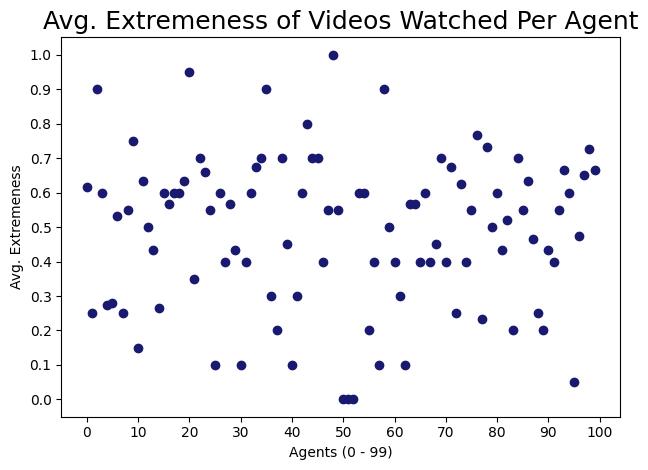

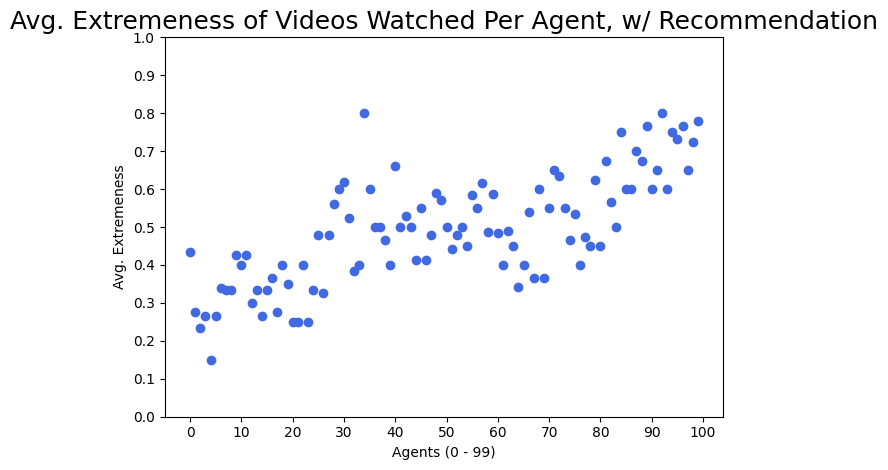

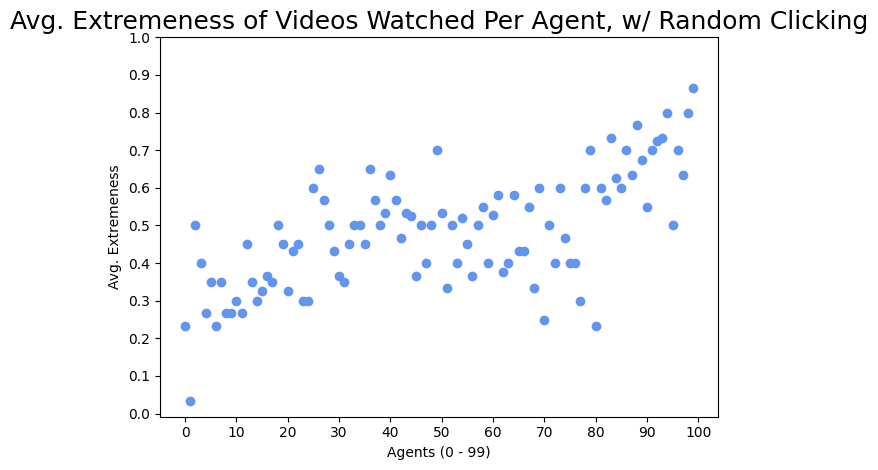

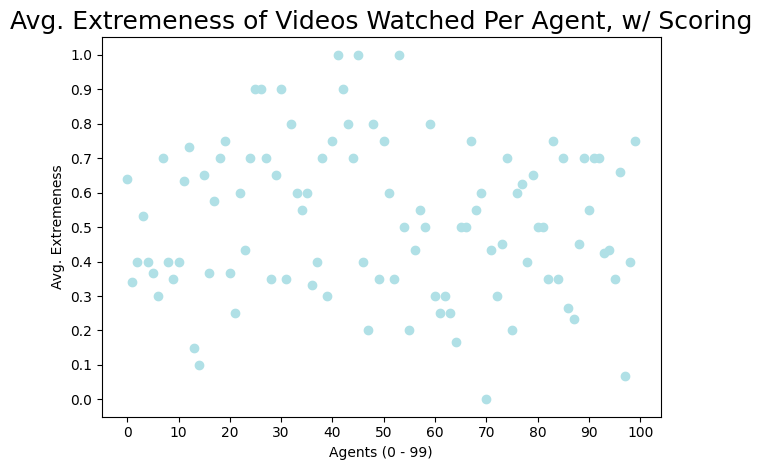

In [16]:
# We now have the extremeness of each video watched for both with and without the recommendation system, as well as the 
# average extremeness across all videos watched with and w/out the system.
# Can we graph to see if the extremeness per individual agent went up?
# For that, we would need to record (in an array of size NUM_AGENTS) the extremeness of every video a particular agent watches,
# then we can just average that out.
# So, append the extremeness of each video a user watches to their own array, then take the average of that array, then append
# those averages into an array of size NUM_AGENTS.

# These arrays are extr_of_each_agent_video_all and extr_of_each_agent_video_all_rec.

import matplotlib as matplotlib
import numpy as np

x = numpy.arange(0, NUM_AGENTS)
y = Reverse(extr_of_each_agent_video_all)

plt.scatter(x,y, color = 'midnightblue') # A bar chart
plt.title('Avg. Extremeness of Videos Watched Per Agent', fontsize = 18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.ylabel('Avg. Extremeness')
# plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'purple')

# defining display layout
plt.tight_layout()

plt.xticks(numpy.arange(0, 101, 10))
plt.yticks(numpy.arange(0, 1.1, 0.1))

plt.show()

if(REC_SYSTEM_TOGGLE):
    
    x = numpy.arange(0, NUM_AGENTS)
    y = Reverse(extr_of_each_agent_video_all_rec)

    plt.scatter(x,y, color = 'royalblue')
    plt.title('Avg. Extremeness of Videos Watched Per Agent, w/ Recommendation', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Avg. Extremeness')

    
    # plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')

    # defining display layout
    plt.tight_layout()

    plt.xticks(numpy.arange(0, 101, 10))
    plt.yticks(numpy.arange(0, 1.1, 0.1))

    
    # #obtain m (slope) and b(intercept) of linear regression line
    # m_rec, b_rec = numpy.polyfit(x, y, 1)

    # #add linear regression line to scatterplot 
    # plt.plot(x, m_rec*x+b_rec)



    plt.show()


if(RAND_SYSTEM_TOGGLE):
    
    x = numpy.arange(0, NUM_AGENTS)
    y = Reverse(extr_of_each_agent_video_all_rand)

    plt.scatter(x,y, color = 'cornflowerblue')
    plt.title('Avg. Extremeness of Videos Watched Per Agent, w/ Random Clicking', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Avg. Extremeness')

    
    # plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')

    # defining display layout
    plt.tight_layout()

    plt.xticks(numpy.arange(0, 101, 10))
    plt.yticks(numpy.arange(0, 1.1, 0.1))

    plt.show()


if(SCORE_SYSTEM_TOGGLE):
    
    x = numpy.arange(0, NUM_AGENTS)
    y = Reverse(extr_of_each_agent_video_all_scoring)

    plt.scatter(x,y, color = 'powderblue')
    plt.title('Avg. Extremeness of Videos Watched Per Agent, w/ Scoring', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Avg. Extremeness')

    
    # plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')

    # defining display layout
    plt.tight_layout()

    plt.xticks(numpy.arange(0, 101, 10))
    plt.yticks(numpy.arange(0, 1.1, 0.1))

    plt.show()

The below cell graphs a regression line for each of the four above graphs, all on one plot.

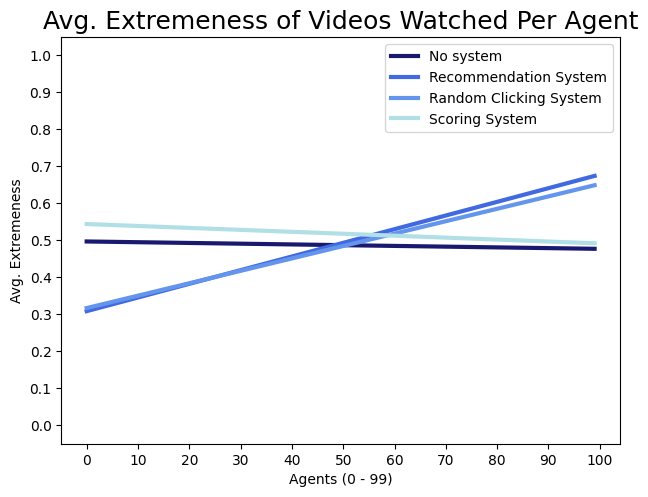

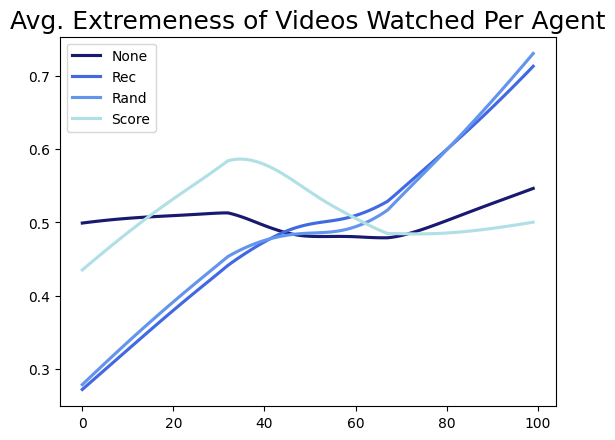

In [17]:

import matplotlib as matplotlib
import numpy as np
import pandas as pd

x = numpy.arange(0, NUM_AGENTS)
y = Reverse(extr_of_each_agent_video_all)

plt.scatter(x,y, color = 'white') # A bar chart
# plt.title('Avg. Extremeness of Videos Watched Per Agent', fontsize = 18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.ylabel('Avg. Extremeness')
# plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'purple')

# defining display layout
plt.tight_layout()

plt.xticks(numpy.arange(0, 101, 10))
plt.yticks(numpy.arange(0, 1.1, 0.1))

#obtain m (slope) and b(intercept) of linear regression line
m, b = numpy.polyfit(x, y, 1)

#add linear regression line to scatterplot 
# plt.plot(x, m*x+b, label = "No system", lw = 3)


# plt.show()

if(REC_SYSTEM_TOGGLE):
    
    x_rec = numpy.arange(0, NUM_AGENTS)
    y_rec = Reverse(extr_of_each_agent_video_all_rec)

    plt.scatter(x_rec,y_rec, color = 'white')
    # plt.title('Avg. Extremeness of Videos Watched Per Agent, w/ Recommendation', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Avg. Extremeness')

    
    # plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')

    # defining display layout
    plt.tight_layout()

    plt.xticks(numpy.arange(0, 101, 10))
    plt.yticks(numpy.arange(0, 1.1, 0.1))

    
    #obtain m (slope) and b(intercept) of linear regression line
    m_rec, b_rec = numpy.polyfit(x_rec, y_rec, 1)

    #add linear regression line to scatterplot 
    # plt.plot(x_rec, m_rec*x_rec+b_rec)



    # plt.show()


if(RAND_SYSTEM_TOGGLE):
    
    x_rand = numpy.arange(0, NUM_AGENTS)
    y_rand = Reverse(extr_of_each_agent_video_all_rand)

    plt.scatter(x_rand,y_rand, color = 'white')
    # plt.title('Avg. Extremeness of Videos Watched Per Agent, w/ Random Clicking', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Avg. Extremeness')

    
    # plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')

    # defining display layout
    plt.tight_layout()

    plt.xticks(numpy.arange(0, 101, 10))
    plt.yticks(numpy.arange(0, 1.1, 0.1))


    #obtain m (slope) and b(intercept) of linear regression line
    m_rand, b_rand = numpy.polyfit(x_rand, y_rand, 1)

    #add linear regression line to scatterplot 
    plt.plot(x_rand, m_rand*x_rand+b_rand)

    # plt.show()


if(SCORE_SYSTEM_TOGGLE):
    
    x_score = numpy.arange(0, NUM_AGENTS)
    y_score = Reverse(extr_of_each_agent_video_all_scoring)

    plt.scatter(x_score,y_score, color = 'white')
    # plt.title('Avg. Extremeness of Videos Watched Per Agent, w/ Scoring', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Avg. Extremeness')

    
    # plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')

    # defining display layout
    plt.tight_layout()

    plt.xticks(numpy.arange(0, 101, 10))
    plt.yticks(numpy.arange(0, 1.1, 0.1))



    #obtain m (slope) and b(intercept) of linear regression line
    m_score, b_score = numpy.polyfit(x_score, y_score, 1)

    #add linear regression line to scatterplot 
    # plt.plot(x_score, m_score*x_score+b_score)


    # plt.show()


plt.title('Avg. Extremeness of Videos Watched Per Agent', fontsize = 18)
plt.plot(x, m*x+b, label = "No system", lw = 3, color = "midnightblue")
plt.plot(x_rec, m_rec*x_rec+b_rec, label = "Recommendation System", lw = 3, color = "royalblue")
plt.plot(x_rand, m_rand*x_rand+b_rand, label = "Random Clicking System", lw = 3, color = "cornflowerblue")
plt.plot(x_score, m_score*x_score+b_score, label = "Scoring System", lw = 3, color = "powderblue")
plt.legend()
plt.show()


plt.title('Avg. Extremeness of Videos Watched Per Agent', fontsize = 18)
sns.regplot(x = x, y = y, lowess=True, scatter = False, label = "None", line_kws={"color": "midnightblue"})
sns.regplot(x = x_rec, y = y_rec, lowess=True, scatter = False, label = "Rec", line_kws={"color": "royalblue"})
sns.regplot(x = x_rand, y = y_rand, lowess=True, scatter = False, label = "Rand", line_kws={"color": "cornflowerblue"})
sns.regplot(x = x_score, y = y_score, lowess=True, scatter = False, label = "Score", line_kws={"color": "powderblue"})
plt.legend(labels=['None', 'Rec', 'Rand', 'Score'])


beta = 0.15


  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 9782
TOTAL # of videos watched today: 231
Average extremeness of videos watched today: 0.5034632034632034
Average extremeness per agents, all (almost same as above): 0.5181500000000001
beta = -1.5


  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 9782
TOTAL # of videos watched today: 231
Average extremeness of videos watched today: 0.5034632034632034
Average extremeness per agents, all (almost same as above): 0.5181500000000001
beta = 50000


  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 9782
TOTAL # of videos watched today: 231
Average extremeness of videos watched today: 0.5034632034632034
Average extremeness per agents, all (almost same as above): 0.5181500000000001
beta = -50000


  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 9782
TOTAL # of videos watched today: 231
Average extremeness of videos watched today: 0.5034632034632034
Average extremeness per agents, all (almost same as above): 0.5181500000000001
beta = 10000000


  0%|          | 0/100 [00:00<?, ?it/s]

TOTAL minutes watched today: 9782
TOTAL # of videos watched today: 231
Average extremeness of videos watched today: 0.5034632034632034
Average extremeness per agents, all (almost same as above): 0.5181500000000001


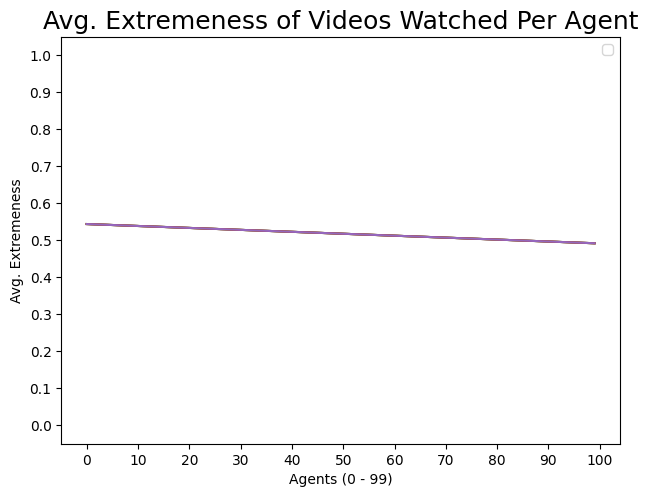

In [18]:

import matplotlib as matplotlib
import numpy as np

beta_values = [0.15, -1.5, 50000, -50000, 10000000]



# Calculates a weighted sum model score for a given user and list of videos.
# The lower the score, the better fit the video is for the agent.
# This version normalizes by dividing each value by the POSSIBLE max.
def calculate_score_multiple_vids_custom_beta(our_agent, our_videos, our_beta):
    alpha = 0.2     # weight placed on video length
    beta = our_beta     # weight placed on video popularity
    gamma = 0.5     # weight placed on video alignment (how similar extremeness is to user's)
    delta = 0.15    # weight placed on extremeness of the video

    our_agent_archetype = our_agent.archetype

    video_scores = []

    # Max values for the video qualities
    max_length = 80
    max_pop = 1000000
    max_align = 1
    max_extr = 1


    for i in range(NUM_VIDEOS):
        # Length values
        our_video = our_videos[i]
        l_return = 0  # return value now that we're using a threshold
        lv = our_video.length
        la = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["longest_vid_threshold"]
        # agents favor shorter videos. so if lv is > la above the length, give a 0. if lv<la, a 1 or something scaled appropriately.
        l_return = ((lv+la)/2)/max_length
        # if(lv > la):    # video length is greater than our archetype's preference
        #     l_return = 0
        # else:
        #     # l_return = lv / max_length
        #     l_return = 1

        # wants videos below threshold---we want the value to be bigger, so this one gets a minus

        # Popularity values
        p_return = 0
        pv = our_video.views
        pa = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["popularity_threshold"]
        # make 0 if below threshold, but scaled appropriately if above
        # instead of the abs it;ll be either a zero or a positive number, keep the minus sign
        p_return = ((pv + pa) / 2) / max_pop
            # if(pv < pa): # video popularity is less than our archetype's preference
            #     p_return = 0
            # else:
            #     p_return = 1
            #     # p_return = pv / max_pop


        # Extremeness values
        ev = our_video.extremeness
        ea = BEHAVIOR_ARCHETYPE_PARAMETERS[our_agent_archetype]["video_extremity"]


        # For small score = good, + in front of components user wants small, and - for components user wants big
        # + in front of component that YouTube wants small
        score = (alpha * l_return) - (beta * p_return) - (gamma * (abs(ev-ea)/max_align)) - (delta * ev)/max_extr

        video_scores.append((i, score))

    return video_scores






for k in range(5):
    
    print("beta = " + str(beta_values[k]))
    total_minutes_watched_today_scoring_betatest = 0   # how many minutes the agent has watched today
    total_vids_watched_today_scoring_betatest = 0  # how many videos the agent watched today
    agent_minutes_watched_today_array_scoring_betatest = []
    agent_vids_watched_today_array_scoring_betatest = []
    agent_extremeness_array_scoring_betatest = []
    videos_watched_extremeness_array_scoring_betatest = []
    extr_of_each_agent_video_all_scoring_betatest = []
    j = 0

    '''
    Change the ERROR below to DEBUG to trigger all of the print statements. 
    They're there mostly as tests from when I was debugging and such.
    However, if you want to see "real-time" info from the simulation as it's running, feel free to uncomment them.
    '''
    logger = logging.getLogger()
    logger.setLevel(logging.ERROR)


    for i in tqdm(range(NUM_AGENTS)): # runs through the simulation for every agent in our array of agents
        
        # print("AGENT #" + str(i))
        # Establishing the values we need from our agent before any videos are watched
        daily_agent = our_agents[i]
        extr_of_each_agent_video_scoring_betatest = []
        daily_agent_archetype = daily_agent.archetype

        # These two need to be declared OUTSIDE of the run for each video.
        # So, declare them within the day for a given agent, but OUTSIDE of the actual video selection checking loop.
        # Otherwise, they don't actually get updated each time.
        agent_minutes_watched_today_scoring_betatest = 0   # how many minutes the agent has watched today
        agent_vids_watched_today_scoring_betatest = 0  # how many videos the agent watched today


        activity_log = []  # ids of the videos the agent watched today


        # Get the values for our agent's archetype

        daily_agent_longest_vid = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["longest_vid_threshold"]
        daily_agent_yt_threshold = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["yt_time_threshold"]
        daily_agent_pol_aff = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["political_affiliation"]
        daily_agent_vid_extr = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["video_extremity"]
        daily_agent_pop_thresh = BEHAVIOR_ARCHETYPE_PARAMETERS[daily_agent_archetype]["popularity_threshold"]


        # When the recommendation system is toggled, gets our agent's pre-filtered list of videos based on their archetype.
        # For this cell, that check does not happen.

        our_agents_videos = all_videos


        time_left_check = True; # means we have enough time for the agent to keep watching videos


        # From 11/5/23: using the score ranking system
        agent_scores = calculate_score_multiple_vids_custom_beta(daily_agent, all_videos, beta_values[k])
        lookup_dict = {vid.vid_id: vid for vid in all_videos}



        # This is where the agent is actually watching videos.

        while(time_left_check == True):

            suggested_video = lookup_dict[agent_scores[j][0]]

            # The below line is the original version, without the scoring system.
            # UNCOMMENT to use the non-scoring system.
            # suggested_video = suggest_video(our_agents_videos, len(our_agents_videos))

            # display_agent(daily_agent)
            # # print("")
            # display_vid_attrs(suggested_video)


            # Compare our agent's thresholds to the attributes of the video


            # Check minimum view threshold
            if(suggested_video.views >= daily_agent_pop_thresh):
                popularity_check = True
                logging.debug("Video is popular enough.")
            else:
                popularity_check = False
                logging.debug("Video is not popular enough.")

            # Check agent's max viewing length
            if(suggested_video.length < daily_agent_longest_vid):
                length_check = True
                logging.debug("Video is proper length.")
            else:
                length_check = False
                logging.debug("Video is too long.")

            # Check if watching this video would exceed the agent's daily threshold
            potential_mins_watched = agent_minutes_watched_today_scoring_betatest + suggested_video.length
            if(potential_mins_watched < daily_agent_yt_threshold):
                time_left_check = True
                logging.debug("Still time to watch this video.")
            else:
                time_left_check = False
                logging.debug("Not enough time left to watch this video.")

            # Check if this video is too extreme for the agent.


        
            # Left-leaning archetypes will watch anything at 0.5 and above. Right-leaning will watch 0.5 and below.
            if(daily_agent_pol_aff == "left"):
                # Will not watch anything under 0.5 extremeness
                # If video extremeness is < 0.5 or higher than their extremeness value, do not watch.
                if((suggested_video.extremeness < 0.5) or (suggested_video.extremeness > daily_agent_vid_extr)):
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True
                    logging.debug("Video is within extremeness bounds (between 0.5 and agent's archetype value).")
            elif(daily_agent_pol_aff == "right"):
                # Will not watch anything above 0.5 extremeness
                # If video extremeness is > 0.5 or lower than their extremeness value (0.0 is extreme here), do not watch.
                if((suggested_video.extremeness > 0.5) or (suggested_video.extremeness < daily_agent_vid_extr)):
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True
                    logging.debug("Video is within extremeness bounds (between agent's archetype value and 0.5).")
            elif(daily_agent_pol_aff == "middle"):
                # print("Extremeness:" + str(suggested_video.extremeness))
                # figuring this archetype is like middle of the road, they'll watch between 0.4 and 0.6
                if((suggested_video.extremeness < 0.2) or (suggested_video.extremeness > 0.8)):
                    
                    extreme_check = False
                    logging.debug("Video was too extreme.")
                else:
                    extreme_check = True 

            # Other todo: find whatever bug/anomaly we mentioned was there

            Activity.watch(suggested_video)     # Agent actually watches the video.
            videos_watched_extremeness_array_scoring_betatest.append(suggested_video.extremeness)
            extr_of_each_agent_video_scoring_betatest.append(suggested_video.extremeness)
            agent_minutes_watched_today_scoring_betatest = agent_minutes_watched_today_scoring_betatest + suggested_video.length
            agent_vids_watched_today_scoring_betatest = agent_vids_watched_today_scoring_betatest + 1 

            j = j+1



            
        
        # From below here, the agent is done watching videos for the day

        total_minutes_watched_today_scoring_betatest = total_minutes_watched_today_scoring_betatest + agent_minutes_watched_today_scoring_betatest
        total_vids_watched_today_scoring_betatest = total_vids_watched_today_scoring_betatest + agent_vids_watched_today_scoring_betatest

        agent_minutes_watched_today_array_scoring_betatest.append(agent_minutes_watched_today_scoring_betatest)
        agent_vids_watched_today_array_scoring_betatest.append(agent_vids_watched_today_scoring_betatest)
        extr_of_each_agent_video_all_scoring_betatest.append(Average(extr_of_each_agent_video_scoring_betatest))
        
        
        # This array needs to get the extremeness threshold of each agent
        agent_extremeness_array_scoring_betatest.append(daily_agent_vid_extr)

        logging.debug("\nVideos watched today: " + str(agent_vids_watched_today_scoring_betatest))
        logging.debug("Minutes watched today: " + str(agent_minutes_watched_today_scoring_betatest))


    avg_videos_watched_extremeness_array_scoring_betatest = (sum(videos_watched_extremeness_array_scoring_betatest) / len(videos_watched_extremeness_array_scoring_betatest))
    print("TOTAL minutes watched today: " + str(total_minutes_watched_today_scoring_betatest))
    print("TOTAL # of videos watched today: " + str(total_vids_watched_today_scoring_betatest))
    print("Average extremeness of videos watched today: " + str(avg_videos_watched_extremeness_array_scoring_betatest))
    print("Average extremeness per agents, all (almost same as above): " + str(Average(extr_of_each_agent_video_all_scoring_betatest)))

    x_score_betatest = numpy.arange(0, NUM_AGENTS)
    y_score_betatest = Reverse(extr_of_each_agent_video_all_scoring_betatest)

    plt.scatter(x_score_betatest,y_score_betatest, color = 'white')
    # plt.title('Avg. Extremeness of Videos Watched Per Agent, w/ Scoring', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Avg. Extremeness')

    
    # plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')

    # defining display layout
    plt.tight_layout()

    plt.xticks(numpy.arange(0, 101, 10))
    plt.yticks(numpy.arange(0, 1.1, 0.1))



    #obtain m (slope) and b(intercept) of linear regression line
    m_score, b_score = numpy.polyfit(x_score, y_score, 1)

    #add linear regression line to scatterplot 
    plt.plot(x_score, m_score*x_score+b_score)


    # plt.show()


if(SCORE_SYSTEM_TOGGLE):
    
    x_score_betatest = numpy.arange(0, NUM_AGENTS)
    y_score_betatest = Reverse(extr_of_each_agent_video_all_scoring_betatest)

    plt.scatter(x_score,y_score, color = 'white')
    # plt.title('Avg. Extremeness of Videos Watched Per Agent, w/ Scoring', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Avg. Extremeness')

    
    # plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')

    # defining display layout
    plt.tight_layout()

    plt.xticks(numpy.arange(0, 101, 10))
    plt.yticks(numpy.arange(0, 1.1, 0.1))



    #obtain m (slope) and b(intercept) of linear regression line
    m_score, b_score = numpy.polyfit(x_score_betatest, y_score_betatest, 1)

    #add linear regression line to scatterplot 
    # plt.plot(x_score, m_score*x_score+b_score)


    # plt.show()


plt.title('Avg. Extremeness of Videos Watched Per Agent', fontsize = 18)
# plt.plot(x_score, m_score*x_score+b_score, label = "Scoring System", lw = 3)
plt.legend()
plt.show()

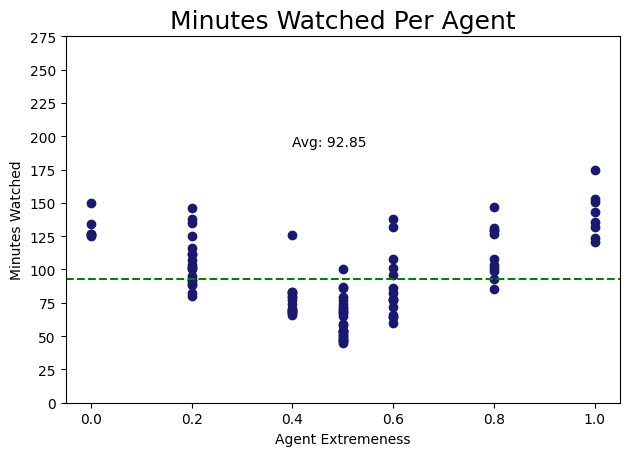

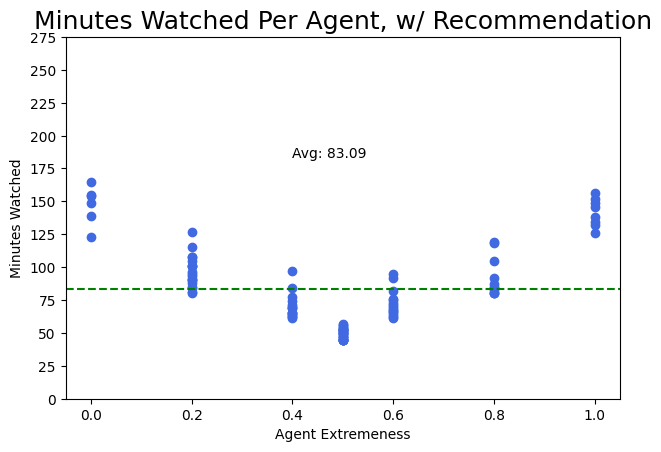

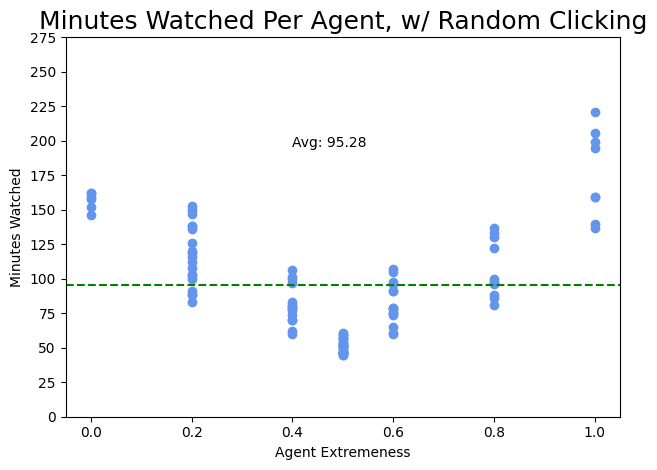

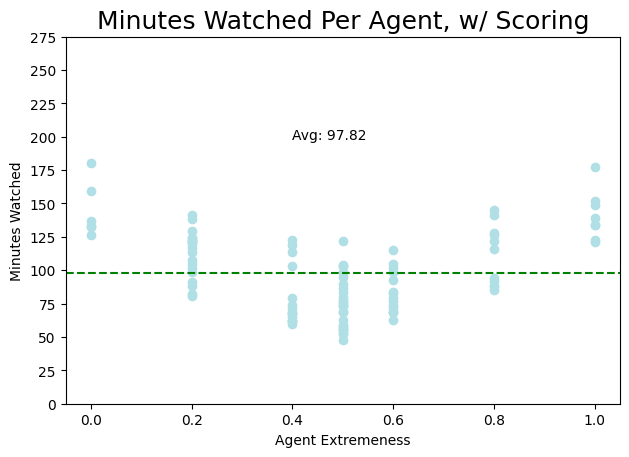

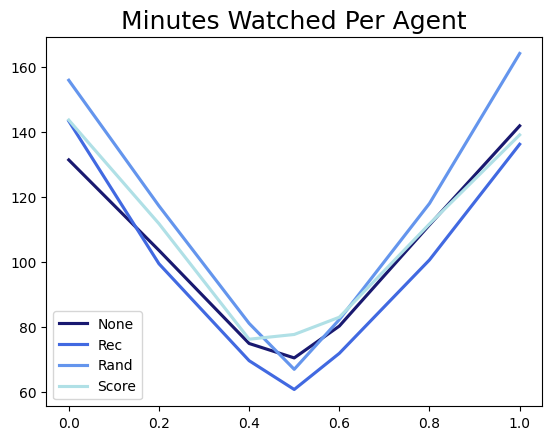

In [19]:
# Let's graph each agent's extremeness with how much they watched per day.

import matplotlib as matplotlib

# Reversing the arrays so extremenesses are in ascending order
x = Reverse(agent_extremeness_array)
y = Reverse(agent_minutes_watched_today_array)


# Let's graph each agent with how much they watched per day.
# x axis = agents (0-199), y axis = minutes watched per agent


plt.scatter(x,y, color = 'midnightblue') # A bar chart
plt.title('Minutes Watched Per Agent', fontsize = 18)
plt.xlabel('Agent Extremeness')
plt.ylabel('Minutes Watched')
plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'green')
plt.text(0.4, numpy.nanmean(y)+ 100, "Avg: " + str(numpy.nanmean(y)), fontsize = 10)

# defining display layout
plt.tight_layout()

plt.yticks(numpy.arange(0, 300, 25))


plt.show()


if(REC_SYSTEM_TOGGLE):
    # Reversing the arrays so extremenesses are in ascending order
        x_rec = Reverse(agent_extremeness_array_rec)
        y_rec = Reverse(agent_minutes_watched_today_array_rec)


        # Let's graph each agent with how much they watched per day.
        # x axis = agents (0-199), y axis = minutes watched per agent


        plt.scatter(x_rec,y_rec, color = 'royalblue') # A bar chart
        plt.title('Minutes Watched Per Agent, w/ Recommendation', fontsize = 18)
        plt.xlabel('Agent Extremeness')
        plt.ylabel('Minutes Watched')
        plt.axhline(numpy.nanmean(y_rec), linestyle = '--', color = 'green')
        plt.text(0.4, numpy.nanmean(y_rec)+ 100, "Avg: " + str(numpy.nanmean(y_rec)), fontsize = 10)

        # defining display layout
        plt.tight_layout()

        plt.yticks(numpy.arange(0, 300, 25))
        
        plt.show()




if(RAND_SYSTEM_TOGGLE):
    # Reversing the arrays so extremenesses are in ascending order
        x_rand = Reverse(agent_extremeness_array_rand)
        y_rand = Reverse(agent_minutes_watched_today_array_rand)


        # Let's graph each agent with how much they watched per day.
        # x axis = agents (0-199), y axis = minutes watched per agent


        plt.scatter(x_rand,y_rand, color = 'cornflowerblue') # A bar chart
        plt.title('Minutes Watched Per Agent, w/ Random Clicking', fontsize = 18)
        plt.xlabel('Agent Extremeness')
        plt.ylabel('Minutes Watched')
        plt.axhline(numpy.nanmean(y_rand), linestyle = '--', color = 'green')
        plt.text(0.4, numpy.nanmean(y_rand)+ 100, "Avg: " + str(numpy.nanmean(y_rand)), fontsize = 10)


        # defining display layout
        plt.tight_layout()

        plt.yticks(numpy.arange(0, 300, 25))
        
        plt.show()



if(SCORE_SYSTEM_TOGGLE):
    # Reversing the arrays so extremenesses are in ascending order
        x_score = Reverse(agent_extremeness_array_scoring)
        y_score = Reverse(agent_minutes_watched_today_array_scoring)


        # Let's graph each agent with how much they watched per day.
        # x axis = agents (0-199), y axis = minutes watched per agent


        plt.scatter(x_score,y_score, color = 'powderblue') # A bar chart
        plt.title('Minutes Watched Per Agent, w/ Scoring', fontsize = 18)
        plt.xlabel('Agent Extremeness')
        plt.ylabel('Minutes Watched')
        plt.axhline(numpy.nanmean(y_score), linestyle = '--', color = 'green')
        plt.text(0.4, numpy.nanmean(y_score)+ 100, "Avg: " + str(numpy.nanmean(y_score)), fontsize = 10)


        # defining display layout
        plt.tight_layout()

        plt.yticks(numpy.arange(0, 300, 25))
        
        plt.show()



plt.title('Minutes Watched Per Agent', fontsize = 18)
sns.regplot(x = x, y = y, lowess=True, scatter = False, label = "None", line_kws={"color": "midnightblue"})
sns.regplot(x = x_rec, y = y_rec, lowess=True, scatter = False, label = "Rec", line_kws={"color": "royalblue"})
sns.regplot(x = x_rand, y = y_rand, lowess=True, scatter = False, label = "Rand", line_kws={"color": "cornflowerblue"})
sns.regplot(x = x_score, y = y_score, lowess=True, scatter = False, label = "Score", line_kws={"color": "powderblue"})
plt.legend(labels=['None', 'Rec', 'Rand', 'Score'])


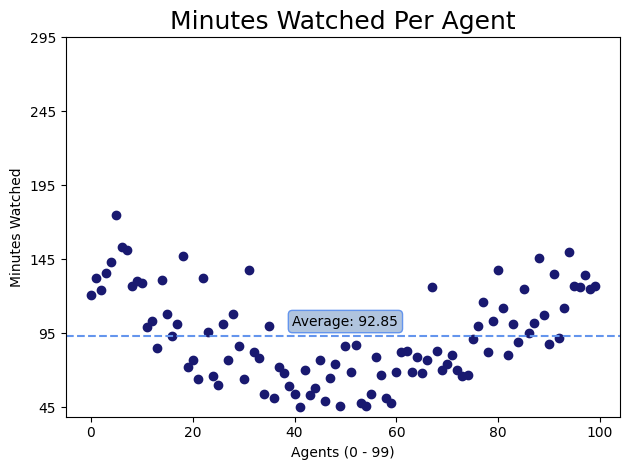

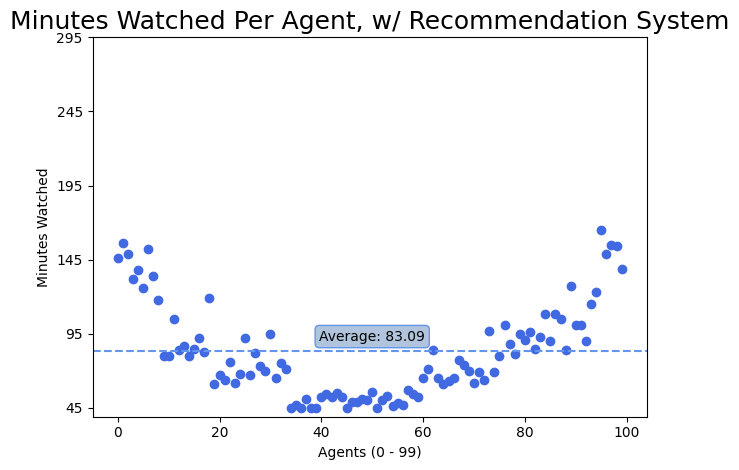

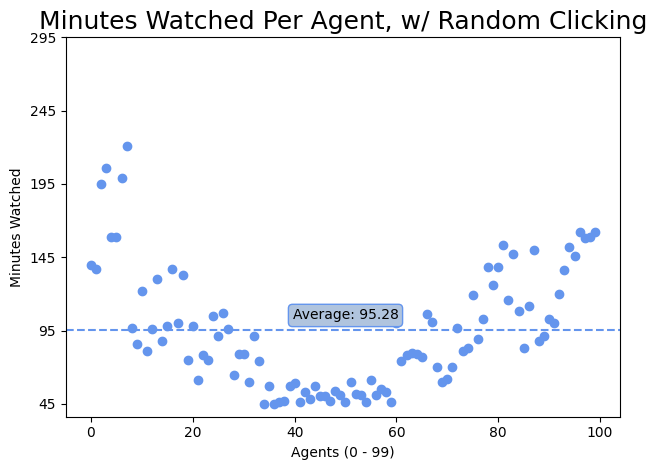

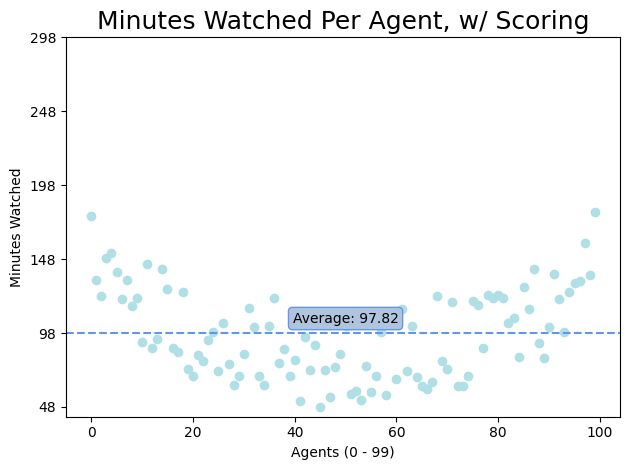

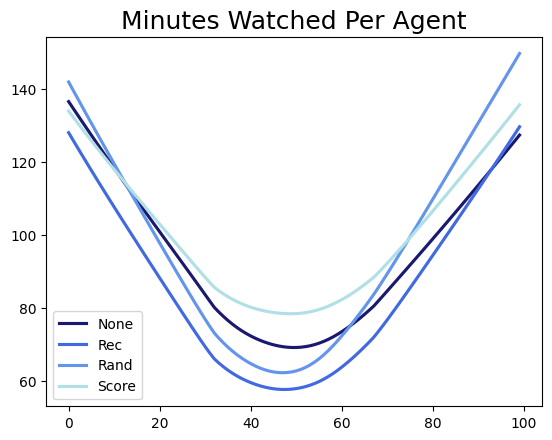

In [20]:
# Let's graph each agent with how much they watched per day.
# x axis = agents (0-199), y axis = minutes watched per agent

x = numpy.arange(0,NUM_AGENTS)
y = agent_minutes_watched_today_array

plt.scatter(x,y, color = 'midnightblue') # A bar chart
plt.title('Minutes Watched Per Agent', fontsize = 18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.ylabel('Minutes Watched')
plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'cornflowerblue')

# defining display layout
plt.tight_layout()


# Sets y-axis range from min in the array to 300, with intervals of 50
plt.yticks(numpy.arange(min(y), 300, 50))


plt.text(50, numpy.nanmean(y) + 10, "Average: " + str(numpy.nanmean(y)), size=10, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='cornflowerblue',   # edge color: rbg values
                   fc='lightsteelblue',   # fill color: rbg values
                   )
         )

plt.show()


if(REC_SYSTEM_TOGGLE):
    x_rec = numpy.arange(0,NUM_AGENTS)
    y_rec = agent_minutes_watched_today_array_rec

    plt.scatter(x_rec,y_rec, color = 'royalblue') # A bar chart
    plt.title('Minutes Watched Per Agent, w/ Recommendation System', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Minutes Watched')
    plt.axhline(numpy.nanmean(y_rec), linestyle = '--', color = 'cornflowerblue')

    # defining display layout
    plt.tight_layout()


    # Sets y-axis range from min in the array to 300, with intervals of 50
    plt.yticks(numpy.arange(min(y_rec), 300, 50))


    plt.text(50, numpy.nanmean(y_rec) + 10, "Average: " + str(numpy.nanmean(y_rec)), size=10, rotation=0.,
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    ec='cornflowerblue',   # edge color: rbg values
                    fc='lightsteelblue',   # fill color: rbg values
                    )
            )

    plt.show()



if(RAND_SYSTEM_TOGGLE):
    x_rand = numpy.arange(0,NUM_AGENTS)
    y_rand = agent_minutes_watched_today_array_rand

    plt.scatter(x_rand,y_rand, color = 'cornflowerblue') # A bar chart
    plt.title('Minutes Watched Per Agent, w/ Random Clicking', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Minutes Watched')
    plt.axhline(numpy.nanmean(y_rand), linestyle = '--', color = 'cornflowerblue')

    # defining display layout
    plt.tight_layout()


    # Sets y-axis range from min in the array to 300, with intervals of 50
    plt.yticks(numpy.arange(min(y_rand), 300, 50))


    plt.text(50, numpy.nanmean(y_rand) + 10, "Average: " + str(numpy.nanmean(y_rand)), size=10, rotation=0.,
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    ec='cornflowerblue',   # edge color: rbg values
                    fc='lightsteelblue',   # fill color: rbg values
                    )
            )

    plt.show()


if(SCORE_SYSTEM_TOGGLE):
    x_score = numpy.arange(0,NUM_AGENTS)
    y_score = agent_minutes_watched_today_array_scoring

    plt.scatter(x_score,y_score, color = 'powderblue') # A bar chart
    plt.title('Minutes Watched Per Agent, w/ Scoring', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Minutes Watched')
    plt.axhline(numpy.nanmean(y_score), linestyle = '--', color = 'cornflowerblue')

    # defining display layout
    plt.tight_layout()


    # Sets y-axis range from min in the array to 300, with intervals of 50
    plt.yticks(numpy.arange(min(y_score), 300, 50))


    plt.text(50, numpy.nanmean(y_score) + 10, "Average: " + str(numpy.nanmean(y_score)), size=10, rotation=0.,
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    ec='cornflowerblue',   # edge color: rbg values
                    fc='lightsteelblue',   # fill color: rbg values
                    )
            )

    plt.show()


plt.title('Minutes Watched Per Agent', fontsize = 18)
sns.regplot(x = x, y = y, lowess=True, scatter = False, label = "None", line_kws={"color": "midnightblue"})
sns.regplot(x = x_rec, y = y_rec, lowess=True, scatter = False, label = "Rec", line_kws={"color": "royalblue"})
sns.regplot(x = x_rand, y = y_rand, lowess=True, scatter = False, label = "Rand", line_kws={"color": "cornflowerblue"})
sns.regplot(x = x_score, y = y_score, lowess=True, scatter = False, label = "Score", line_kws={"color": "powderblue"})
plt.legend(labels=['None', 'Rec', 'Rand', 'Score'])


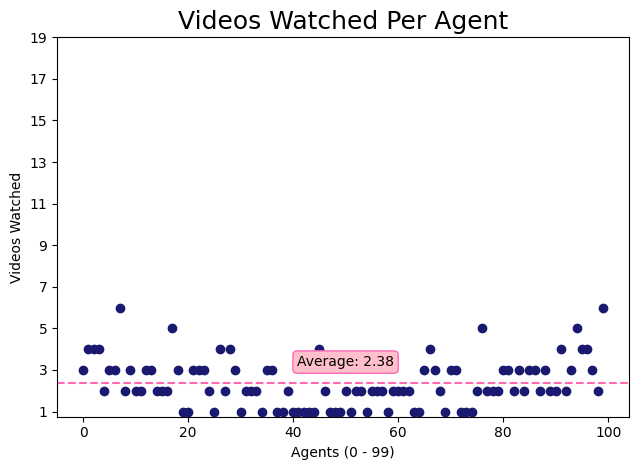

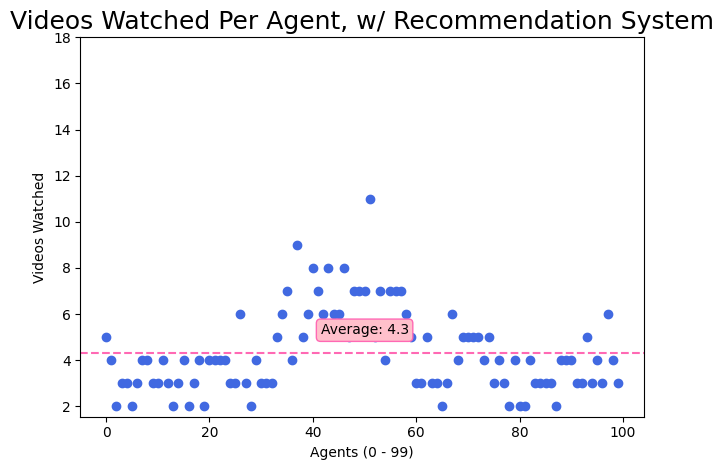

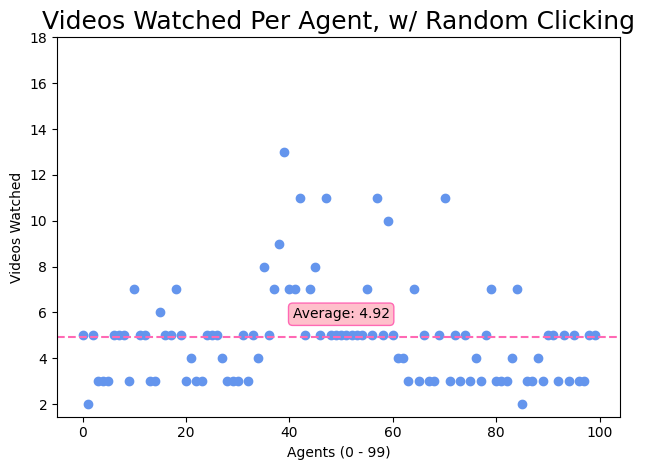

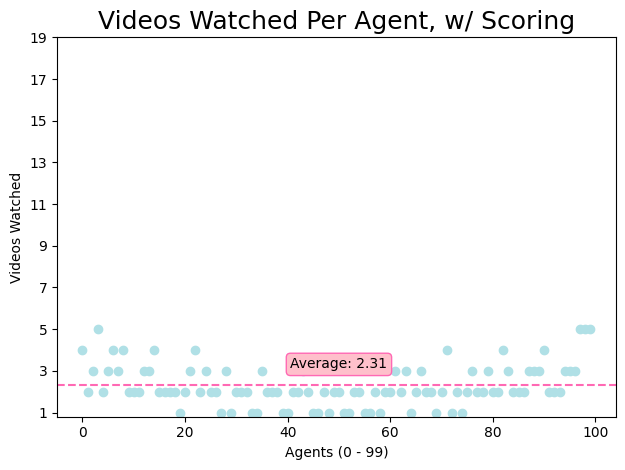

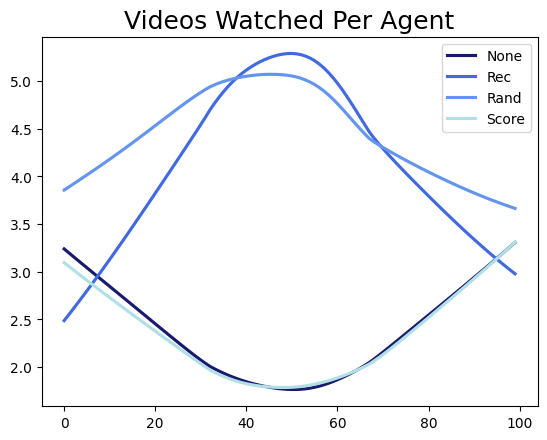

In [21]:
# Let's graph each agent with how many videos they watched per day.
# x axis = agents (0-99), y axis = videos watched per agent

x = numpy.arange(0,NUM_AGENTS)
y = agent_vids_watched_today_array

plt.scatter(x,y, color = 'midnightblue') # A bar chart
plt.title('Videos Watched Per Agent', fontsize = 18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.ylabel('Videos Watched')
plt.axhline(numpy.nanmean(y), linestyle = '--', color = 'hotpink')

# defining display layout
plt.tight_layout()

# Sets y-axis range from min in the array to 20, with intervals of 2
plt.yticks(numpy.arange(min(y), 20, 2))


plt.text(50, numpy.nanmean(y) + 1, "Average: " + str(numpy.nanmean(y)), size=10, rotation=0.,
         ha="center", va="center",
         bbox=dict(boxstyle="round",
                   ec='hotpink',   # edge color: rbg values
                   fc='pink',   # fill color: rbg values
                   )
         )

plt.show()


if(REC_SYSTEM_TOGGLE):
    x_rec = numpy.arange(0,NUM_AGENTS)
    y_rec = agent_vids_watched_today_array_rec

    plt.scatter(x_rec,y_rec, color = 'royalblue') # A bar chart
    plt.title('Videos Watched Per Agent, w/ Recommendation System', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Videos Watched')
    plt.axhline(numpy.nanmean(y_rec), linestyle = '--', color = 'hotpink')

    # defining display layout
    plt.tight_layout()

    # Sets y-axis range from min in the array to 20, with intervals of 2
    plt.yticks(numpy.arange(min(y_rec), 20, 2))

    plt.text(50, numpy.nanmean(y_rec) + 1, "Average: " + str(numpy.nanmean(y_rec)), size=10, rotation=0.,
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    ec='hotpink',   # edge color: rbg values
                    fc='pink',   # fill color: rbg values
                    )
            )

    plt.show()



if(RAND_SYSTEM_TOGGLE):
    x_rand = numpy.arange(0,NUM_AGENTS)
    y_rand = agent_vids_watched_today_array_rand

    plt.scatter(x_rand,y_rand, color = 'cornflowerblue') # A bar chart
    plt.title('Videos Watched Per Agent, w/ Random Clicking', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Videos Watched')
    plt.axhline(numpy.nanmean(y_rand), linestyle = '--', color = 'hotpink')

    # defining display layout
    plt.tight_layout()

    # Sets y-axis range from min in the array to 20, with intervals of 2
    plt.yticks(numpy.arange(min(y_rand), 20, 2))

    plt.text(50, numpy.nanmean(y_rand) + 1, "Average: " + str(numpy.nanmean(y_rand)), size=10, rotation=0.,
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    ec='hotpink',   # edge color: rbg values
                    fc='pink',   # fill color: rbg values
                    )
            )

    plt.show()


if(SCORE_SYSTEM_TOGGLE):
    x_score = numpy.arange(0,NUM_AGENTS)
    y_score = agent_vids_watched_today_array_scoring

    plt.scatter(x_score,y_score, color = 'powderblue') # A bar chart
    plt.title('Videos Watched Per Agent, w/ Scoring', fontsize = 18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.ylabel('Videos Watched')
    plt.axhline(numpy.nanmean(y_score), linestyle = '--', color = 'hotpink')

    # defining display layout
    plt.tight_layout()

    # Sets y-axis range from min in the array to 20, with intervals of 2
    plt.yticks(numpy.arange(min(y_score), 20, 2))

    plt.text(50, numpy.nanmean(y_score) + 1, "Average: " + str(numpy.nanmean(y_score)), size=10, rotation=0.,
            ha="center", va="center",
            bbox=dict(boxstyle="round",
                    ec='hotpink',   # edge color: rbg values
                    fc='pink',   # fill color: rbg values
                    )
            )

    plt.show()



plt.title('Videos Watched Per Agent', fontsize = 18)
sns.regplot(x = x, y = y, lowess=True, scatter = False, label = "None", line_kws={"color": "midnightblue"})
sns.regplot(x = x_rec, y = y_rec, lowess=True, scatter = False, label = "Rec", line_kws={"color": "royalblue"})
sns.regplot(x = x_rand, y = y_rand, lowess=True, scatter = False, label = "Rand", line_kws={"color": "cornflowerblue"})
sns.regplot(x = x_score, y = y_score, lowess=True, scatter = False, label = "Score", line_kws={"color": "powderblue"})
plt.legend(labels=['None', 'Rec', 'Rand', 'Score'])

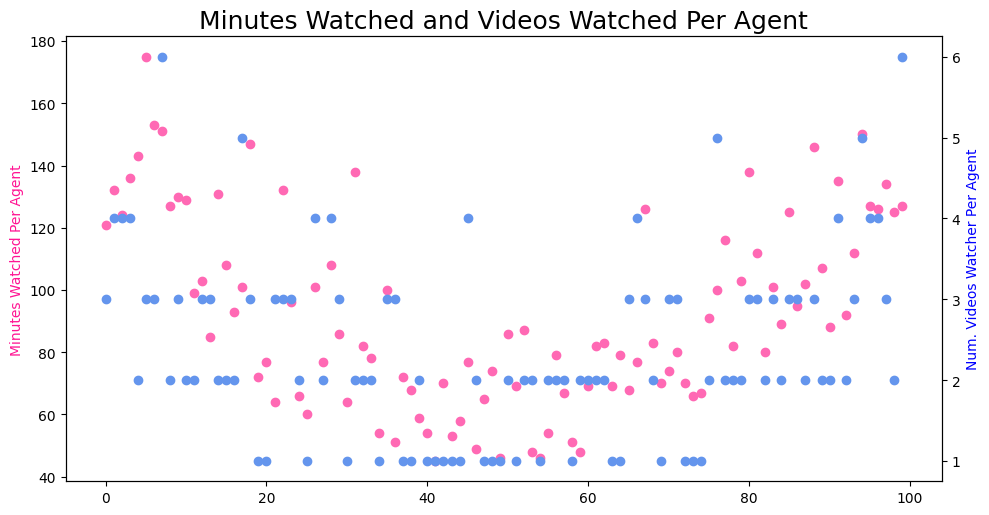

In [22]:
# Let's graph the above two side by side as a scatter plot.

y1 = agent_minutes_watched_today_array
y2 = agent_vids_watched_today_array

fig, ax = plt.subplots(figsize = (10, 5))

# using the twinx() for creating
# another axes object for secondary y-Axis
ax2 = ax.twinx()
# creating a bar plot
ax.scatter(x, y1, color = 'hotpink')
ax2.scatter(x, y2, color = 'cornflowerblue')

# giving labels to the axises
# ax.set_xlabel('x-axis', color = 'r')
ax.set_ylabel('Minutes Watched Per Agent', color = 'deeppink')

# secondary y-axis label
ax2.set_ylabel('Num. Videos Watcher Per Agent', color = 'b')
 
# defining display layout
plt.tight_layout()

# plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_minutes_watched_today_array, color = 'hotpink')
# plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_vids_watched_today_array, color = 'cornflowerblue') # use second y axis

plt.title('Minutes Watched and Videos Watched Per Agent', fontsize=18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.show()

Well, that looks confusing! Let's do the same thing, but with bars. That way, we can see the viewing habits for each agent more clearly.

KeyboardInterrupt: 

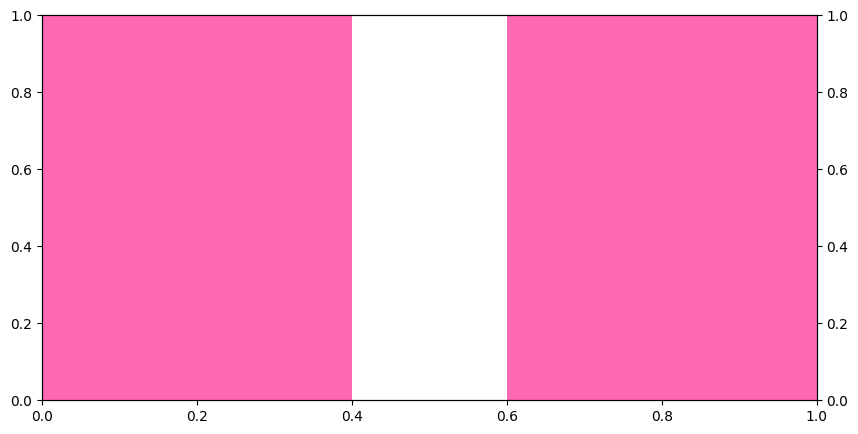

In [23]:
# Let's graph the above two side by side as a bar plot.

y1 = agent_minutes_watched_today_array
y2 = agent_vids_watched_today_array

fig, ax = plt.subplots(figsize = (10, 5))

# using the twinx() for creating
# another axes object for secondary y-Axis
ax2 = ax.twinx()
# creating a bar plot
ax.bar(x, y1, color = 'hotpink')
ax2.bar(x, y2, color = 'cornflowerblue')

# giving labels to the axises
# ax.set_xlabel('x-axis', color = 'r')
ax.set_ylabel('Minutes Watched Per Agent', color = 'deeppink')

# secondary y-axis label
ax2.set_ylabel('Num. Videos Watcher Per Agent', color = 'b')
 
# defining display layout
plt.tight_layout()

# plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_minutes_watched_today_array, color = 'hotpink')
# plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_vids_watched_today_array, color = 'cornflowerblue') # use second y axis

plt.title('Minutes Watched and Videos Watched Per Agent', fontsize=18)
plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
plt.show()


if(RAND_SYSTEM_TOGGLE):
    # Let's graph the above two side by side as a bar plot.

    y1 = agent_minutes_watched_today_array_rand
    y2 = agent_vids_watched_today_array_rand

    fig, ax = plt.subplots(figsize = (10, 5))

    # using the twinx() for creating
    # another axes object for secondary y-Axis
    ax2 = ax.twinx()
    # creating a bar plot
    ax.bar(x, y1, color = 'hotpink')
    ax2.bar(x, y2, color = 'cornflowerblue')

    # giving labels to the axises
    # ax.set_xlabel('x-axis', color = 'r')
    ax.set_ylabel('Minutes Watched Per Agent', color = 'deeppink')

    # secondary y-axis label
    ax2.set_ylabel('Num. Videos Watcher Per Agent', color = 'b')
    
    # defining display layout
    plt.tight_layout()

    # plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_minutes_watched_today_array, color = 'hotpink')
    # plt.scatter(x=numpy.arange(0,NUM_AGENTS), y=agent_vids_watched_today_array, color = 'cornflowerblue') # use second y axis

    plt.title('Minutes Watched and Videos Watched Per Agent, w/ Random Clicking', fontsize=18)
    plt.xlabel('Agents (0 - ' + str(NUM_AGENTS-1) + ')')
    plt.show()

### Todo List 📝

* ✅10/23/23: Figure out a formula that tells you, for any given agent and any given video, what's L? Does everyone have a specific ideal video length they're comparing potential vids to? Do the same for P, A, E, T. Figure out a formula for each of those, and then combine them into a weighted sum.
    * The formula for alignment A(video, agent) = abs(Ev = Ea). Make a formula like this for each.
* Once, you ahve the weighted sums, you can rank vidoe sand feed them to the agent.
* ✅Think about further research questions---"if you had to talk to your mom/grandma/friend about this, what would you tell them you've learned or want to learn?"
    * Q1: Does the presence of a recommendation algorithm influence how much extreme content a given user consumes? What about users overall?
    * Q2: If the recommendation algorithm results in more extreme videos being shown to users (and watched), how can we combat this? i.e., how can we work against the algorithm when it comes to suggesting content with high extremeness?
* Next steps (10/8/23):
    * You've got the random clicking now. Good. Next, graph side by side graphs with and without the sorting/filtration of the video list. Then compare those side by side---the filtration is the recommendation algorithm here (on a small scale).
* ✅Get things to work with a different number of agents.
* ✅? Figure out why some agents aren't watching any videos at all. Are they really going through the whole list? Out of 10,000 videos, does not a single one really work for the middle ground people? Probably not.
    * NOTE from 7/31: I'm still not sure what the issue is. It's not extremeness (I don't think), it's not the amount of views, and the issue is the same even when scaling up the number of videos. Thus, there's a chance it's something with how the videos are being generated, and whether a) every agent is seeing every video (which they probably aren't), or b) it's something with the agent's "pickiness" in terms of selecting a video
    * NOTE from 8/1: okay what the HECK did I change. I changed something somewhere (I think it was the thresholds in the behavior_reference doc), but now for some reason just about every agent is watching a video. Literally what. I guess I won't complain because it's "working" now, but I have no clue if that was what fixed it. 
    * I THINK ITS MAKING EVERYONE A PROGRESSIVE ACTIVIST!!!! WHAT!!!!!!!!!!
    * okay I got it
*  ✅Actually get the recommendation function working (that's kind of the whole point of this). There's probably a lot you can graph from that---like little maps, almost, of what videos map to which (and their extremeness, etc.).
    * On that note, actually figure out what links two videos. Is it within a certain extremeness value? Or what?
* ✅Think about research questions you're aiming to answer---how are you going to examine and tell that story? 
    * e.g. do more extreme agents get channeled to more extreme videos? what graph would show that?
    * Does the recommendation system make users watch more extreme videos than what they would watch without the system? Can we compare side-by-side the video extremeness for agents with and without the system?
    * If the recommendation system does, in fact, channel viewers towards more extreme content, in what ways can we mitigate or reduce these effects?
    * Do extreme videos continually beget more extreme videos? i.e. is there a "rabbit hole" effect where an agent's watched videos become more and more extreme? Can we use a graph to make a map of which videos (and their extremeness) recommend each other?

* ✅Look at package -- ```logging``` (can automate print statements and such) 

# The Recommendation Algorithm

Okay, so. Paul Covington, Jay Adams, and Emre Sargin. 2016. Deep Neural Networks for YouTube Recommendations. In Proceedings of the 10th ACM Conference on Recommender Systems (RecSys '16). Association for Computing Machinery, New York, NY, USA, 191–198. https://doi.org/10.1145/2959100.2959190 is a paper from Google that outlines how their recommendation system works. Fantastic hearing it right from them. In short, they use two very large neural networks: one to narrow down the massive corpus of YouTube videos into a couple hundred that are relevant to the user, and one to rank these aforementioned videos in order of relevance to the user (which is then what's recommended). The narrowing down part isn't too exciting; there's a nice fancy equation they give for it. What I'm more concerned about is the ranking part. The videos are ranked by using logistic regression to assign a "score" to each video based on several hundred "features" about the user and video in question. This kind of bothers me. The paper lists some of these "incredibly robust" features (whether the user is logged in, their previous search queries, user's past history with the video's channel), but what are the rest of them??? I found another article (https://thecityvoice.org/2020/05/14/google-wants-to-know-your-gender-heres-why/) that discusses how Google's ad service determines your gender of its own accord and uses this determination in its marketing, which may have me predisposed to being suspicious of these supposedly robust features, but I only found that in the first place because the paper mentions that gender is considered as a factor (and on a [0,1] scale). So. I also didn't get any answer on how exactly videos relate to each other--I wasn't able to tell in how much isolation the neural network part happens from the actual video being watched, but it seems the video currently being watched only impacts which videos are narrowed down from the corpus (since it's in that equation).

### How My Algorithm Has to Work

I guess I have to create a similar "score-assigning" ranking system, but what will my incredibly robust features be? In this case, it's probably extremeness, but is that enough? Enough for what--getting a larger holistic picture of the recommendation system, or how particularly the recommendation system uses extremeness? I should also look into logistic regression--I'm sure Scikit or some other library I already have imported here has some flavor of it that I can use.

![Recommendation System Planning.png](<attachment:Recommendation System Planning.png>)
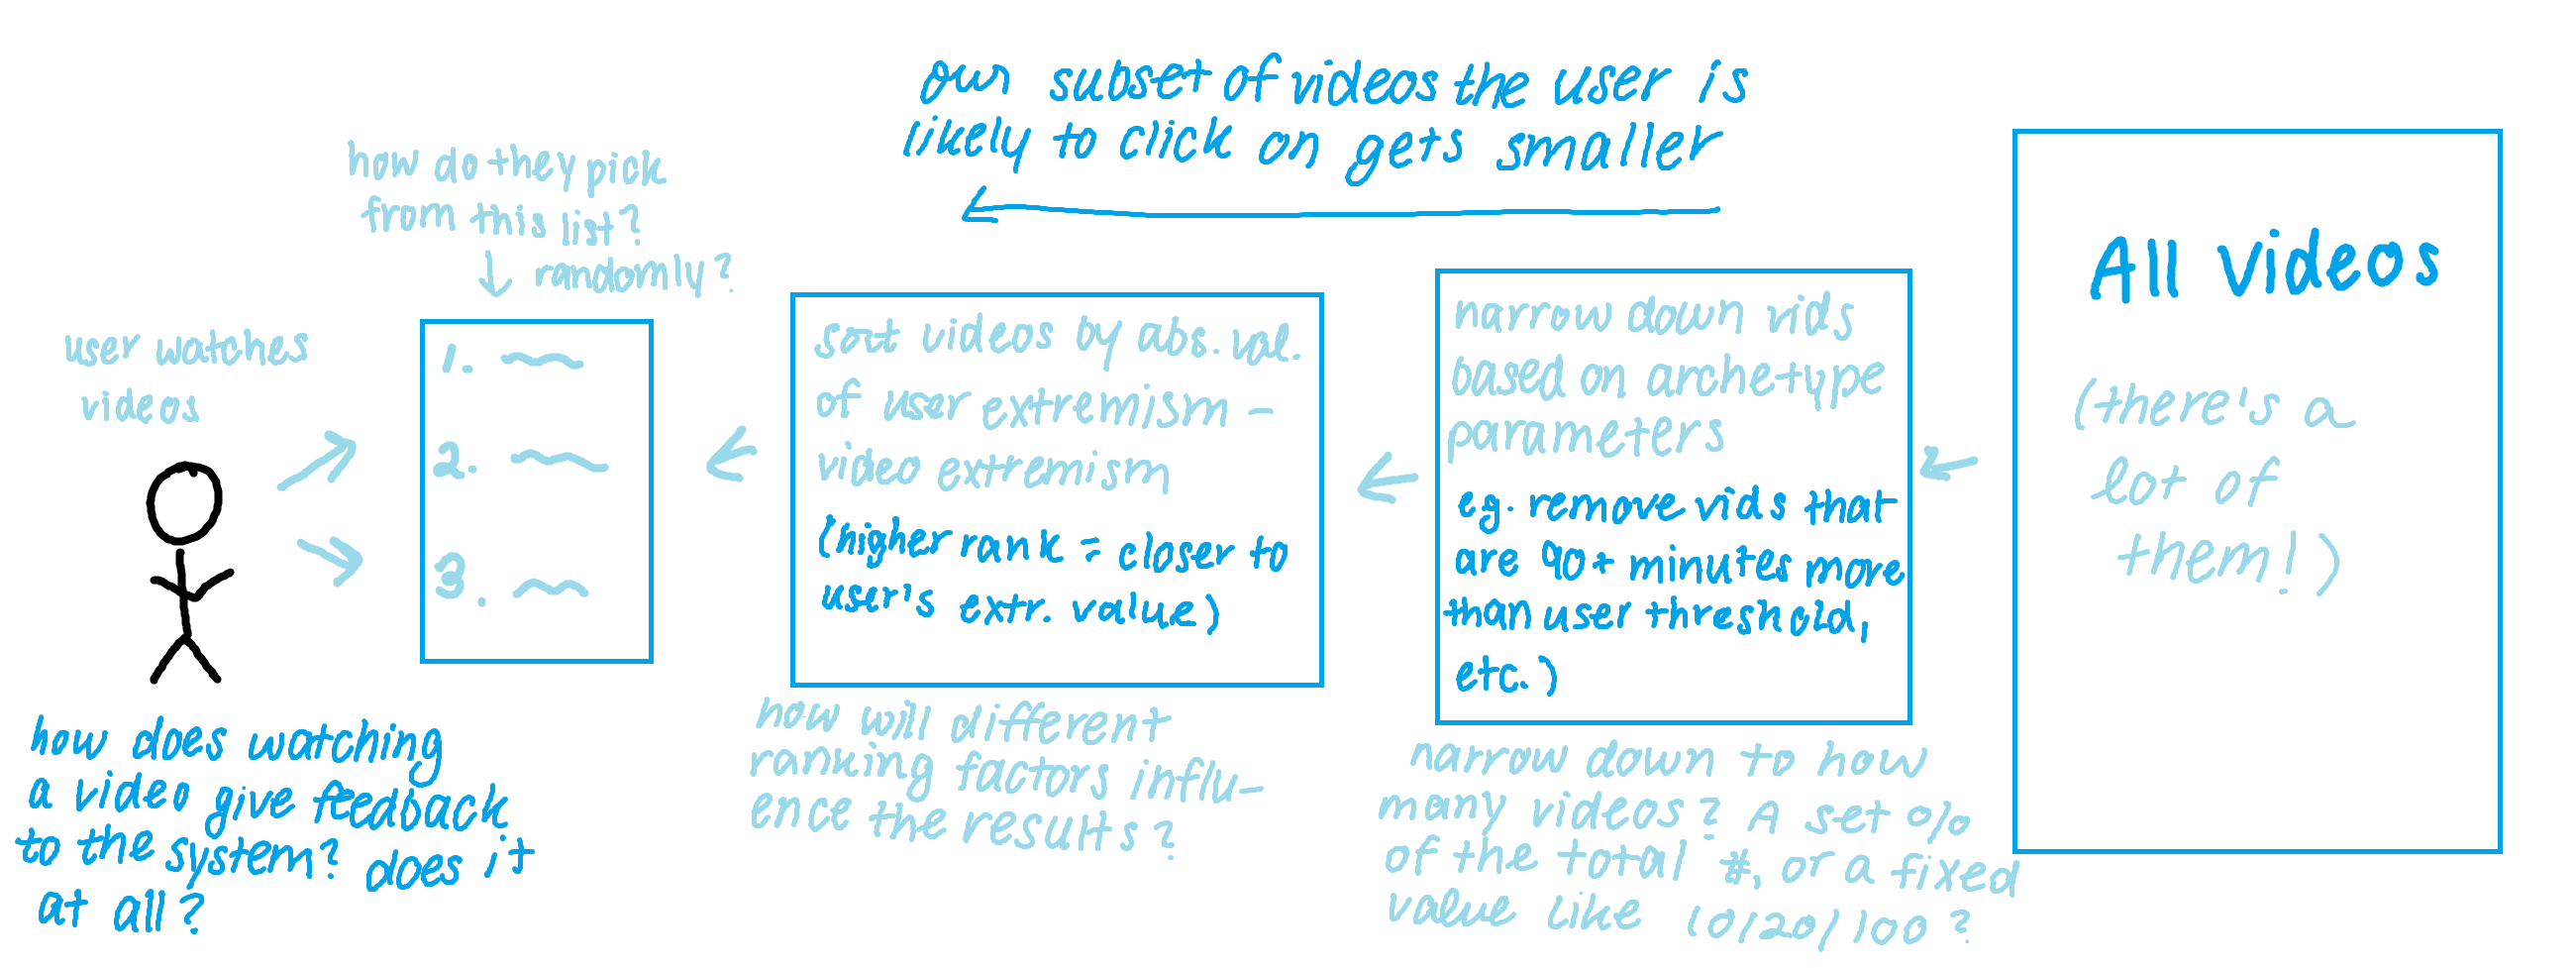